# Mini Projet Data Science 1

**<span style="color : red">Objectif :**   Explorer et analyser des données relatives à l'attrition client, et proposer un modèle de prédiction performant.

La detection de l’attrition ou churn est un processus predictif permettant de detecter le clients risquant de quitter une entreprise (eg., op ́erateur mobile). Les approches d’apprentissage supervisé peuvent aider à predire le risque de perte de clientèle afin de mettre en place rapidemment des action preventives efficaces.

Pour ce projet, nous étudions deux datasets [DATA1_churn_analysis , DATA2_churn_analysis](https://sites.google.com/site/severineaffeldt/DataScience1_dataProjet.tar.gz?attredirects=0&d=1) comportant des données des clients ayant souscrits un abonnement mobile/internet. Une colonne churn donne la variable target à predire.

* 1. Data
    * 1.1. Data overview 
* 2. Exploratory Data Analysis
    * 2.1. Customer attrition in data
    * 2.2. Varibles distribution in customer attrition
* 2. Correlation Metrics
* 4. Data preprocessing 
* 5. Model Building
    * 5.1 Logistic Regression (BaseLine Model)  
    * 5.2 Logistic Regression (SMOTE)
    * 5.3 Decision Tree Visualization
    * 5.4 Random forest 
    * 5.5 Boosting
    * 5.6 Support Vector Machine
* 6. Model Performances 
    * 6.1 Model performances metrics
    * 6.2 Compare Model Metrics
    * 6.3 ROC - Curves for models

* 7. Conclusion & Perspective

In [544]:
library("ggplot2")  # Visualisation des données
library("gridExtra")
library("dplyr")    # Manipulation des données
library("caret")
library("DMwR")
library("e1071")
library("ROCR")
library("rpart")
library("rpart.plot")
library("randomForest")
library("gbm")
library("MASS")
library("corrplot")

## 1. Data

In [600]:
# Ouvrir le dataset correspond au deuxiemes jeux de données 
dataset2 <- read.csv("DATA2_churn_analysis.csv", header = TRUE, 
                     sep = ",", dec = ".", na.strings = c("", "NA"))
#attach(dataset2)

# Afficher les premieres lignes de notre jeux de données
head(dataset2)

state,account.length,area.code,phone.number,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,...,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,customer.service.calls,churn
KS,128,415,382-4657,no,yes,25,"265,1",110,"45,07",...,99,"16,78","244,7",91,"11,01","10,0",3,"2,70",1,False
OH,107,415,371-7191,no,yes,26,"161,6",123,"27,47",...,103,"16,62","254,4",103,"11,45","13,7",3,"3,70",1,False
NJ,137,415,358-1921,no,no,0,"243,4",114,"41,38",...,110,"10,30","162,6",104,"7,32","12,2",5,"3,29",0,False
OH,84,408,375-9999,yes,no,0,"299,4",71,"50,90",...,88,"5,26","196,9",89,"8,86","6,6",7,"1,78",2,False
OK,75,415,330-6626,yes,no,0,"166,7",113,"28,34",...,122,"12,61","186,9",121,"8,41","10,1",3,"2,73",3,False
AL,118,510,391-8027,yes,no,0,"223,4",98,"37,98",...,101,"18,75","203,9",118,"9,18","6,3",6,"1,70",0,False


### 1.1. Data overview 

In [601]:
# Afficher les dimensions de notre jeux de données
print(paste("Rows     : ", dim(dataset2)[1]))
print(paste("Columns  : ", dim(dataset2)[2]))

# Afficher les features 
cat("\n\n")
print(paste("Features :"))
colnames(dataset2)

# Compter le nombre de valeurs manquantes dans chacune des colonnes
print(paste("Missing values : ", sum(sapply(dataset2, function(x) sum(is.na(x))))))
                                            
# Connaitres le nombre de valeurs différentes de chaque colonne de notre jeux de données
cat("\n\n\n")
print("Uniques values :")
sapply(dataset2, function(x) length(unique(x)))   
       
# Connaitre les types des colonnes de notres dataframe
str(dataset2)

[1] "Rows     :  3333"
[1] "Columns  :  21"


[1] "Features :"


[1] "state"                  "account.length"         "area.code"             
 [4] "phone.number"           "international.plan"     "voice.mail.plan"       
 [7] "number.vmail.messages"  "total.day.minutes"      "total.day.calls"       
[10] "total.day.charge"       "total.eve.minutes"      "total.eve.calls"       
[13] "total.eve.charge"       "total.night.minutes"    "total.night.calls"     
[16] "total.night.charge"     "total.intl.minutes"     "total.intl.calls"      
[19] "total.intl.charge"      "customer.service.calls" "churn"

[1] "Missing values :  0"



[1] "Uniques values :"


state         account.length              area.code 
                    51                    212                      3 
          phone.number     international.plan        voice.mail.plan 
                  3333                      2                      2 
 number.vmail.messages      total.day.minutes        total.day.calls 
                    46                   1667                    119 
      total.day.charge      total.eve.minutes        total.eve.calls 
                  1667                   1611                    123 
      total.eve.charge    total.night.minutes      total.night.calls 
                  1440                   1591                    120 
    total.night.charge     total.intl.minutes       total.intl.calls 
                   933                    162                     21 
     total.intl.charge customer.service.calls                  churn 
                   162                     10                      2

'data.frame':	3333 obs. of  21 variables:
 $ state                 : Factor w/ 51 levels "AK","AL","AR",..: 17 36 32 36 37 2 20 25 19 50 ...
 $ account.length        : int  128 107 137 84 75 118 121 147 117 141 ...
 $ area.code             : int  415 415 415 408 415 510 510 415 408 415 ...
 $ phone.number          : Factor w/ 3333 levels "327-1058","327-1319",..: 1927 1576 1118 1708 111 2254 1048 81 292 118 ...
 $ international.plan    : Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 1 2 ...
 $ voice.mail.plan       : Factor w/ 2 levels "no","yes": 2 2 1 1 1 1 2 1 1 2 ...
 $ number.vmail.messages : int  25 26 0 0 0 0 24 0 0 37 ...
 $ total.day.minutes     : num  265 162 243 299 167 ...
 $ total.day.calls       : int  110 123 114 71 113 98 88 79 97 84 ...
 $ total.day.charge      : num  45,1 27,5 41,4 50,9 28,3 ...
 $ total.eve.minutes     : num  197,4 195,5 121,2 61,9 148,3 ...
 $ total.eve.calls       : int  99 103 110 88 122 101 108 94 80 111 ...
 $ total.eve.charge      : num  16,78

## 2. Exploratory Data Analysis

### 2.1. Customer attrition in data

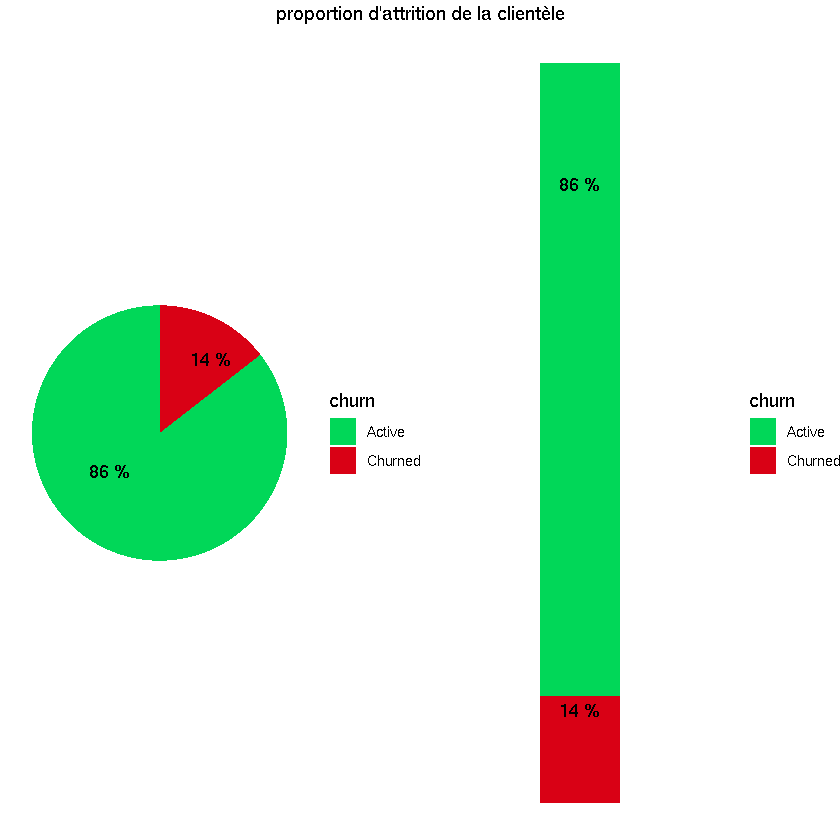

In [602]:
# Affciher la  proportion d'attrition de la clientèle dans les données 

d <- data.frame(table(dataset2$churn)) %>%
    mutate(churn = c("Active", "Churned")) %>%
    mutate(prop = Freq * 100 / dim(dataset2)[1]) %>%
    mutate(label.prop = cumsum(prop) + 0.5 * prop)

colors <- c("#01D758", "#D90115")

bp <- ggplot(d, aes(x="", y=prop, fill=churn, colors = c("green", "red"))) +
    geom_bar( stat = "identity", width = 0.3)  +
    geom_text(aes(label=paste(round(d$prop), "%")), vjust = 1.5, color = "black", size =4.5) +
    scale_fill_manual(values = colors) +
    theme_void()

pie <- bp + geom_bar(stat = "identity") +
    coord_polar("y", start = 0) +
    geom_text(aes(label = paste(round(d$prop), "%")), vjust = c(6,-2), color = "black", size = 4.5) +
    theme_void()

grid.arrange(pie, bp, top = "proportion d'attrition de la clientèle", ncol = 2, nrow = 1)

### 2.2. Varibles distribution in customer attrition

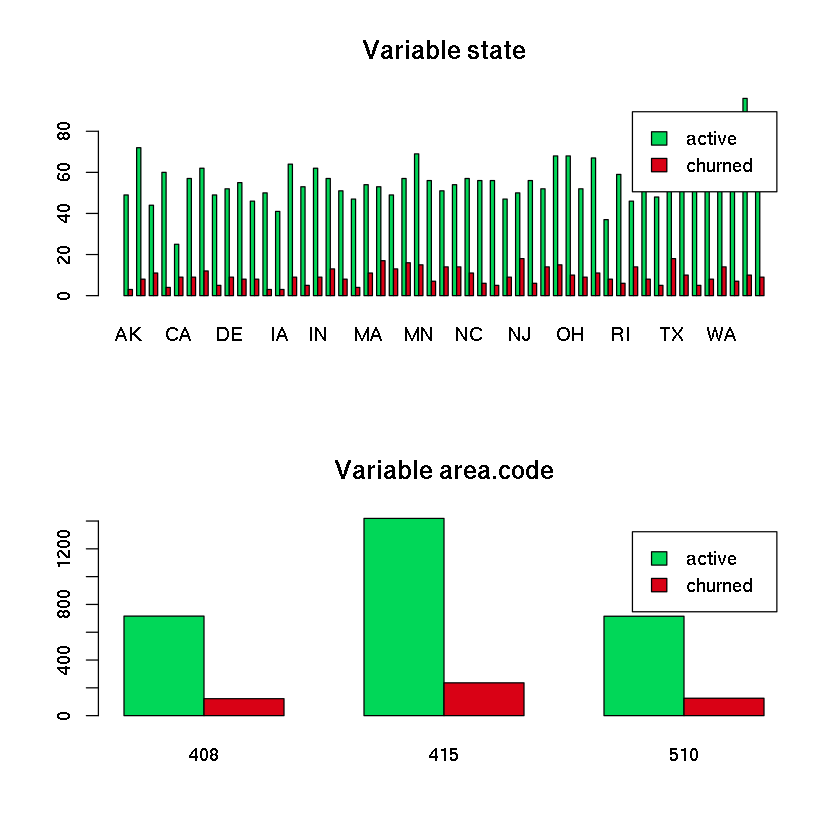

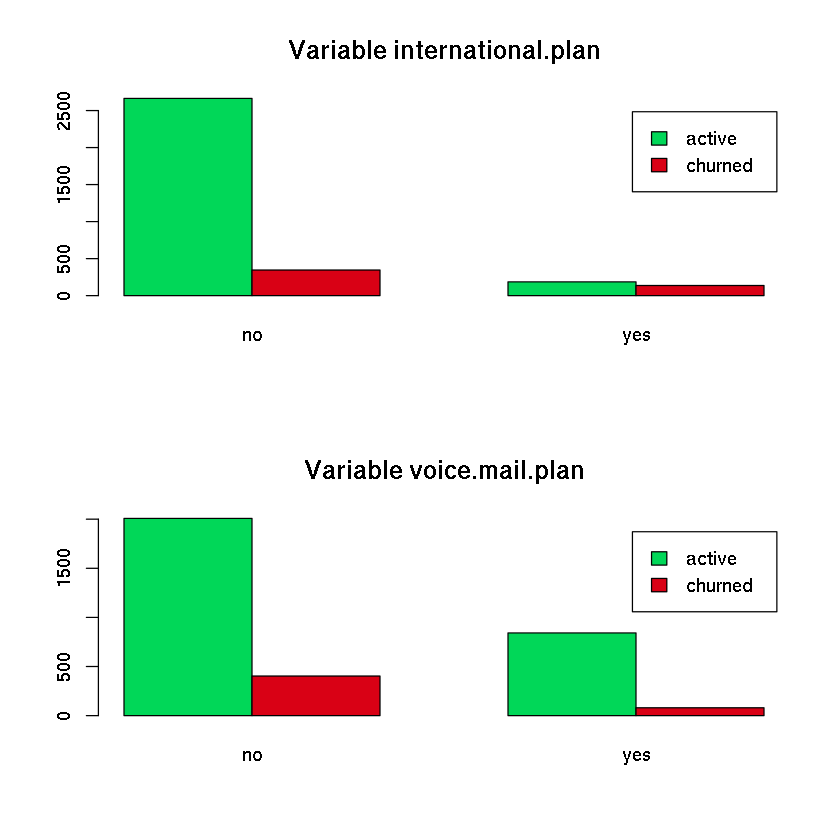

In [603]:
#  Variable Catégorilles

par(mfrow = c(2,1))

# Variable state
barplot(table(dataset2$churn, dataset2$state),  beside = T, col = colors, legend.text = c("active", "churned"), main = "Variable state")

# Variable area.code
barplot(table(dataset2$churn, dataset2$area.code),  beside = T, col = colors, legend.text = c("active", "churned"), main = "Variable area.code")

# Variable international.plan
barplot(table(dataset2$churn, dataset2$international.plan),  beside = T, col = colors, legend.text = c("active", "churned"), main = "Variable international.plan")

# Variable voice.mail.plan
barplot(table(dataset2$churn, dataset2$voice.mail.plan),  beside = T, col = colors, legend.text = c("active", "churned"), main = "Variable voice.mail.plan")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1,0    73,0   100,0   100,8   127,0   243,0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1,0    76,0   103,0   102,7   127,0   225,0 

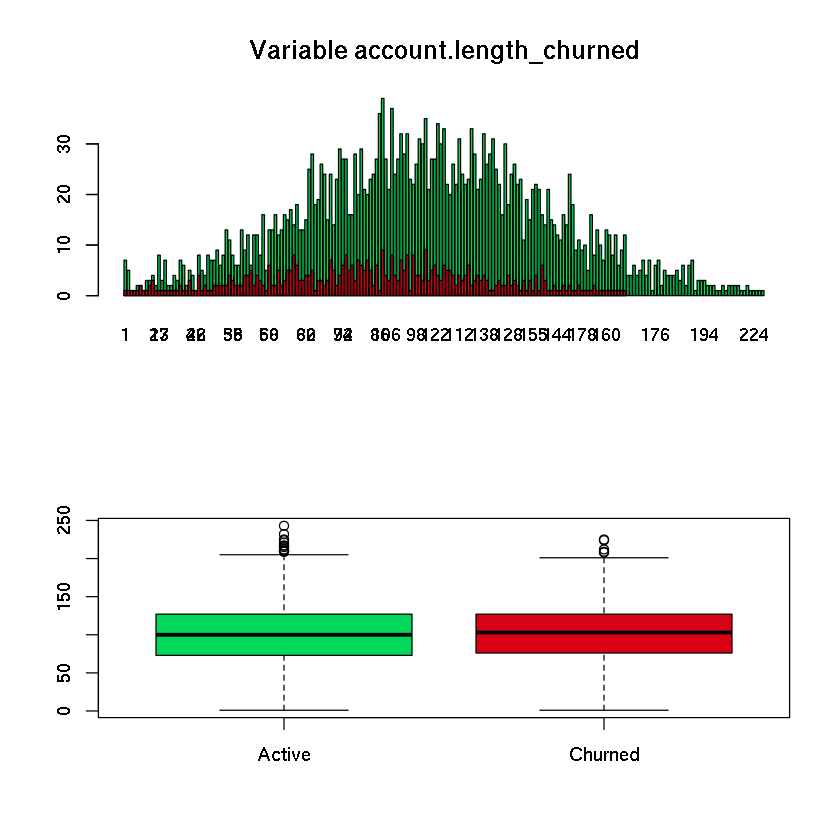

In [604]:
# Variables quantitatives 

# Variable account.length_churned 
summary(account.length_active)
summary(account.length_churned)


par(mfrow = c(2,1))

account.length_churned <- dataset2[dataset2$churn == "True","account.length"]
account.length_active <- dataset2[dataset2$churn == "False","account.length"]

barplot(table(account.length_active), col = colors[1], main = "Variable account.length_churned")
barplot(table(account.length_churned), col = colors[2], add = T, names.arg  = NULL)
boxplot(account.length_active, account.length_churned, names = c("Active", "Churned"), col = colors)

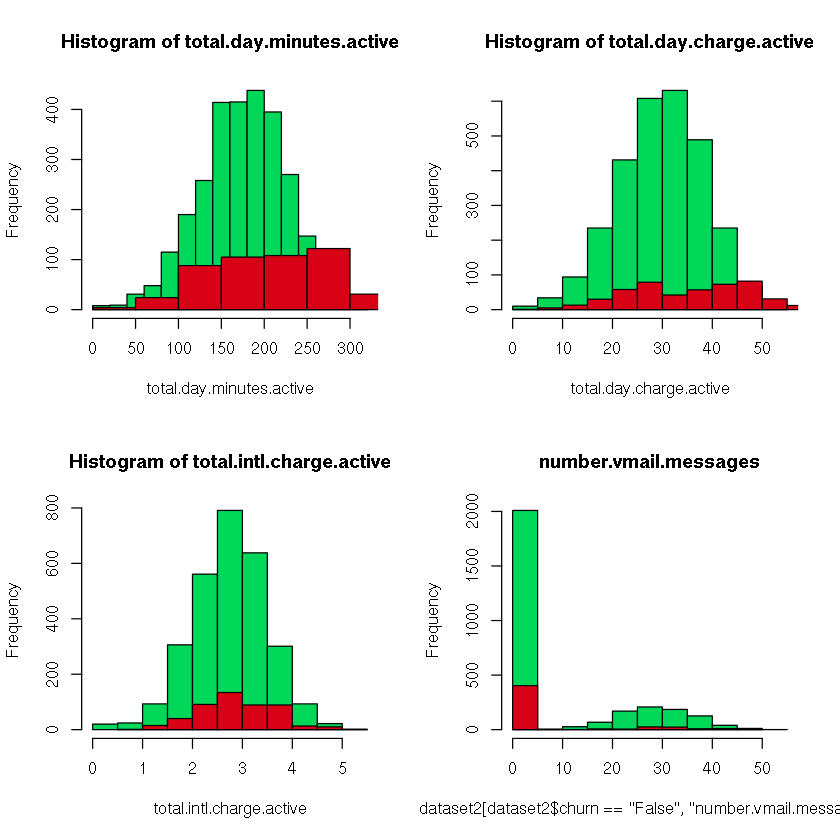

In [605]:
# Variable total.day.minutes
par(mfrow = c(2,2))
total.day.minutes.active <- dataset2[dataset2$churn == "False", "total.day.minutes"]
total.day.minutes.churned <- dataset2[dataset2$churn == "True", "total.day.minutes"]

hist(total.day.minutes.active, col = colors[1])
hist(total.day.minutes.churned, col = colors[2], add = T)

# Varaible total.day.charge
total.day.charge.active <- dataset2[dataset2$churn == "False", "total.day.charge"]
total.day.charge.churned <- dataset2[dataset2$churn == "True", "total.day.charge"]

hist(total.day.charge.active, col = colors[1])
hist(total.day.charge.churned, col = colors[2], add = T)

# Variable total.intl.charge
total.intl.charge.active <- dataset2[dataset2$churn == "False", "total.intl.charge"]
total.intl.charge.churned <- dataset2[dataset2$churn == "True", "total.intl.charge"]

hist(total.intl.charge.active, col = colors[1])
hist(total.intl.charge.churned, col = colors[2], add = T)

# Varaible number.vmail.messages
hist(dataset2[dataset2$churn == "False", "number.vmail.messages"], col = colors[1], main = "number.vmail.messages")
hist(dataset2[dataset2$churn == "True", "number.vmail.messages"], col = colors[2], add = T)


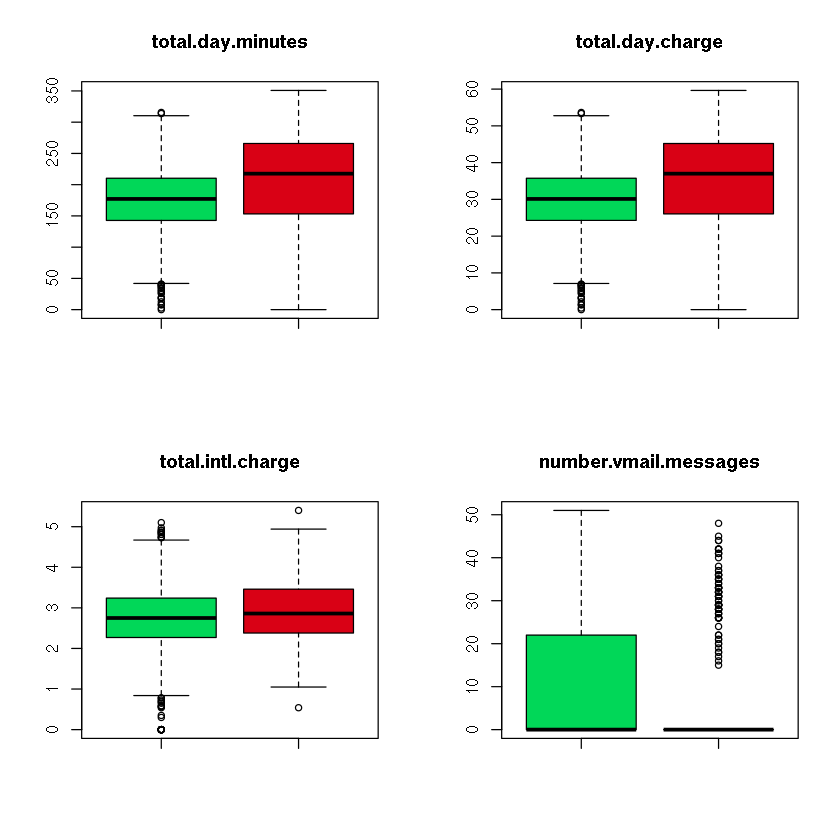

In [649]:
# Variable total.day.minutes
par(mfrow = c(2,2))
total.day.minutes.active <- dataset2[dataset2$churn == "False", "total.day.minutes"]
total.day.minutes.churned <- dataset2[dataset2$churn == "True", "total.day.minutes"]

boxplot(total.day.minutes.active,total.day.minutes.churned, col = colors, main= "total.day.minutes")

        
# Varaible total.day.charge
total.day.charge.active <- dataset2[dataset2$churn == "False", "total.day.charge"]
total.day.charge.churned <- dataset2[dataset2$churn == "True", "total.day.charge"]

boxplot(total.day.charge.active, total.day.charge.churned, col = colors, main ="total.day.charge" )

# Variable total.intl.charge
total.intl.charge.active <- dataset2[dataset2$churn == "False", "total.intl.charge"]
total.intl.charge.churned <- dataset2[dataset2$churn == "True", "total.intl.charge"]

boxplot(total.intl.charge.active, total.intl.charge.churned, col = colors, main = "total.intl.charge")

# Varaible number.vmail.messages

boxplot(dataset2[dataset2$churn == "False", "number.vmail.messages"],dataset2[dataset2$churn == "True", "number.vmail.messages"], col = colors, main = "number.vmail.messages")


On remarque qu'il existe beaucoups d'ourtliers dans les variables quantitatives

## 3. Correlation Metrics

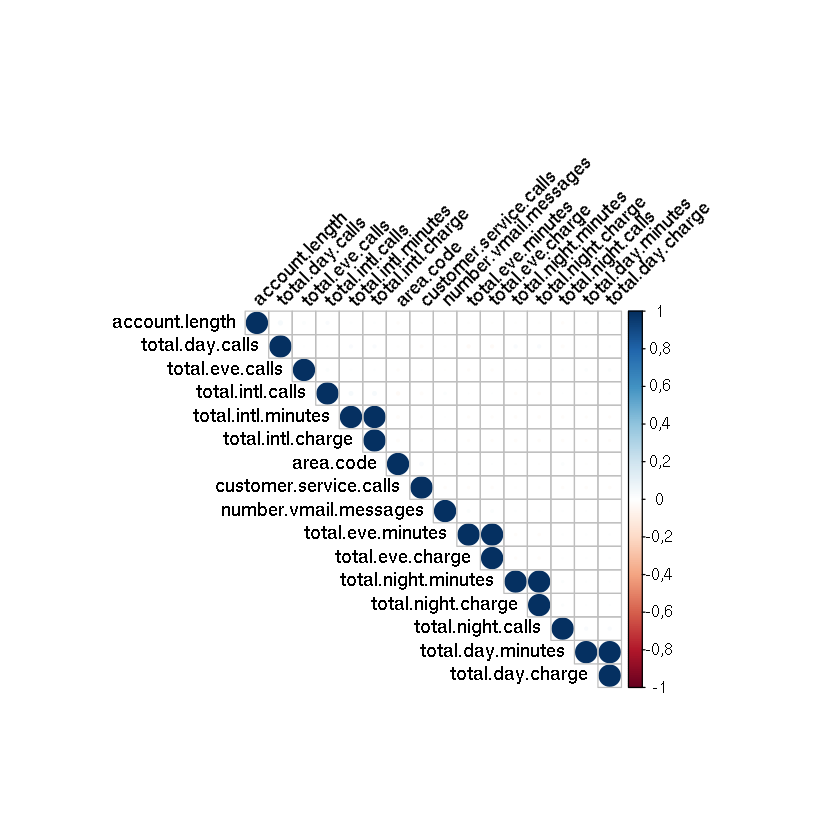

In [607]:
# Correlation metric
mtxcor <- cor(dataset2[, -c(1,4,5,6,21)])

# Visualiser une matrice de corrélation avec un corrélogramme
corrplot(mtxcor, type="upper", order="hclust", tl.col="black", tl.srt=45)


d'aprés la matrice de correlation on constate qu'il n'existe aucune correlation lineaire entre les attributs mais vue les diagrammes qu'on a dessinés ci-dessus on constate qu'il y'a une dependence non lineaire entre certrain attribut le churn.

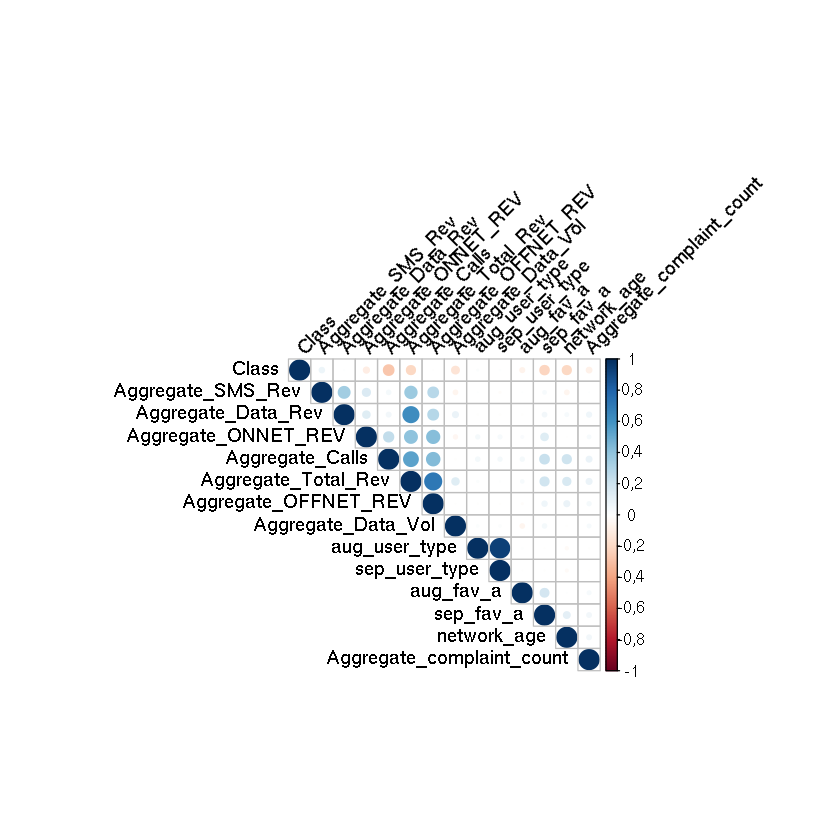

In [659]:

library(tidyr)
data.chern1 <- data.chern1 %>% drop_na()

data.chern1$aug_user_type <- as.numeric(as.factor(data.chern1$aug_user_type))
data.chern1$sep_user_type <-  as.numeric(as.factor(data.chern1$sep_user_type))
data.chern1$aug_fav_a <- as.numeric(as.factor(data.chern1$aug_fav_a))
data.chern1$sep_fav_a <- as.numeric(as.factor(data.chern1$sep_fav_a))
data.chern1$Class <- as.numeric(as.factor(data.chern1$Class))
cormatrice1 <- cor( x= data.chern1)
corrplot(cormatrice1, type="upper", order="hclust", tl.col="black", tl.srt=45)
# 'aprés la matrice de correlation on constate qu'il n'existe aucune correlation lineaire entre les attributs mais vue les diagrammes qu'on a dessinés ci-dessus on constate qu'il y'a une dependence non lineaire entre certrain attribut le churn.



## 4. Data preprocessing 

In [608]:
# Creer une copie du dataset2
ds2 <- dataset2

# Indexation 
ds2$index <- 1:dim(ds2)[1]

# Supprimer l'attribut phone.number du dataset ds2
ds2$phone.number <- NULL

# Encoder une variable catégorielle avec le one hot encoder
# Encoder la variable state
#for(unique_value in unique(ds2$state)){
#  ds2[paste("state", unique_value, sep = ".")] <- ifelse(ds2$state == unique_value, 1, 0)
#}

ds2$state <- as.numeric(ds2$state)

# Supprimer la variable state
#ds2$state <- NULL


# Encoder la variable voice.mail.plan
for(unique_value in unique(ds2$voice.mail.plan)){
  ds2[paste("voice.m.plan", unique_value, sep = ".")] <- ifelse(ds2$voice.mail.plan == unique_value, 1, 0)
}

# Supprimer la variable voice.mail.plan
ds2$voice.mail.plan <- NULL


# Encoder la variable international.plan
for(unique_value in unique(ds2$international.plan)){
  ds2[paste("inter.plan", unique_value, sep = ".")] <- ifelse(ds2$international.plan == unique_value, 1, 0)
}

# Supprimer la variable international.plan
ds2$international.plan <- NULL

# Fonction pour détecter et supprimer les outliers
ourtliers <- function(data, variable) {
    q <- quantile(data[,variable])
    q1 <- q[2]
    q3 <- q[4]
    index.valeur.extremes.sup <- data[data[,variable] > (q3 + 1.5*(q3-q1)), "index"]                                             
    data <- subset(data, !(data$index %in% (index.valeur.extremes.sup)))
    index.valeur.extremes.inf <- data[data[,variable]  < (q1 -  1.5*(q3-q1)), "index"]                                             
    data <- subset(data, !(data$index %in% (index.valeur.extremes.inf)))
    print(paste(variable, " : ", (length(index.valeur.extremes.sup)+length(index.valeur.extremes.inf))))
    return(data)
}

# Suppression des outliers
nbline <- dim(ds2)[1]
print("Detect and delete outliers : "); cat("\n")
for( variable in colnames(ds2[, 1:16])) {
    ds2 <- ourtliers(data = ds2, variable)
}
cat("\n")
print(paste("total lines deleted : ", nbline - dim(ds2)[1]))

cat("\n")
print(paste("Rows     : ", dim(ds2)[1]))
print(paste("Columns  : ", dim(ds2)[2]))

# Mettre les colonnes sur le mêmes échelle


# Numériser la variable churn à prédire  
#ds2$churn <- as.numeric(ds2$churn) - 1


[1] "Detect and delete outliers : "

[1] "state  :  0"
[1] "account.length  :  18"
[1] "area.code  :  0"
[1] "number.vmail.messages  :  1"
[1] "total.day.minutes  :  24"
[1] "total.day.calls  :  21"
[1] "total.day.charge  :  2"
[1] "total.eve.minutes  :  25"
[1] "total.eve.calls  :  19"
[1] "total.eve.charge  :  2"
[1] "total.night.minutes  :  30"
[1] "total.night.calls  :  20"
[1] "total.night.charge  :  0"
[1] "total.intl.minutes  :  44"
[1] "total.intl.calls  :  76"
[1] "total.intl.charge  :  5"

[1] "total lines deleted :  287"

[1] "Rows     :  3046"
[1] "Columns  :  23"


In [609]:
# fonction pour afficher la matrice de confusion 
draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

### 5.1 Logistic Regression (BaseLine Model) 

In [610]:
# Split Data 

# Numériser la variable churn à prédire  
ds2.bis <- ds2 
ds2.bis$churn <- as.numeric(ds2$churn) - 1

# 80/20 train test split  
index <- createDataPartition(y = ds2.bis$churn, p = 0.8, list = FALSE)

train.df <- ds2.bis[index, ]
test.df <- ds2.bis[-index, ]

# Check balance of the training split
print("balance of the training split :")
table(train.df$churn)
cat("\n")

# Check balance of the test split 
print("balance of the test split :")
table(test.df$churn)

[1] "balance of the training split :"



   0    1 
2092  345 


[1] "balance of the test split :"



  0   1 
521  88 

#### On vois bien que le jeux de données est très déséquilibrées pour la variable churn


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

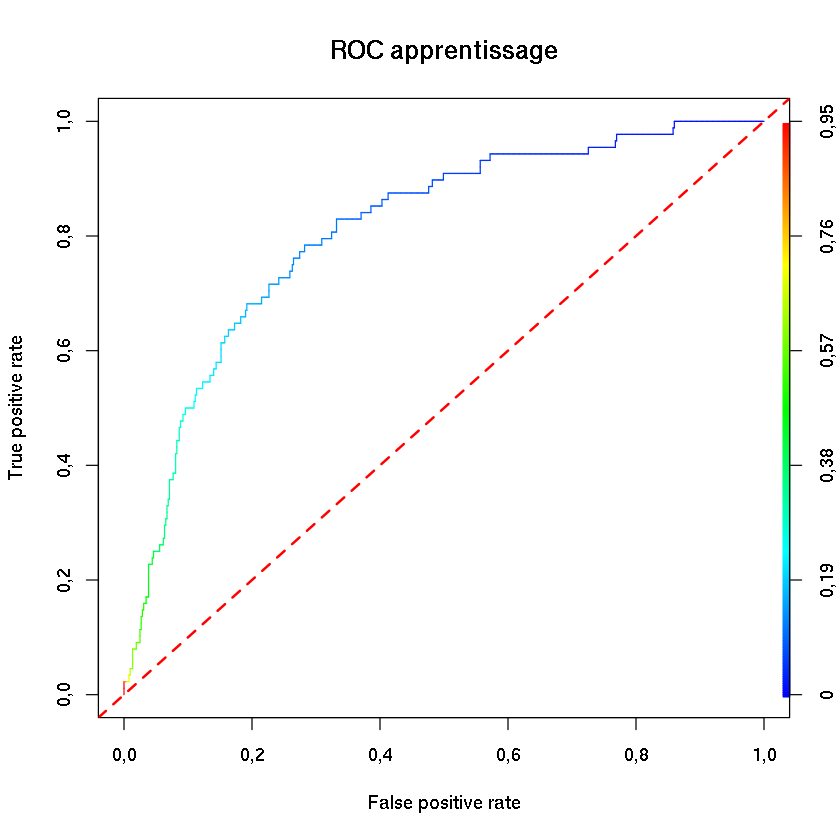

In [611]:
# Run model 
Logistic.baseline.model <- glm(churn ~ ., data = train.df, family = binomial(link = "logit"))

# Predict 
log.pred.probs <- predict(Logistic.baseline.model, newdata = test.df, type = "response")

# ROC - Curves 
pred <- prediction(log.pred.probs, as.factor(test.df$churn))
perf <- performance(pred, "tpr", "fpr")
plot(perf, colorize = TRUE, main = "ROC apprentissage")
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)

# Convert probs to binary
log.pred <- ifelse(log.pred.probs > 0.5, 1, 0)


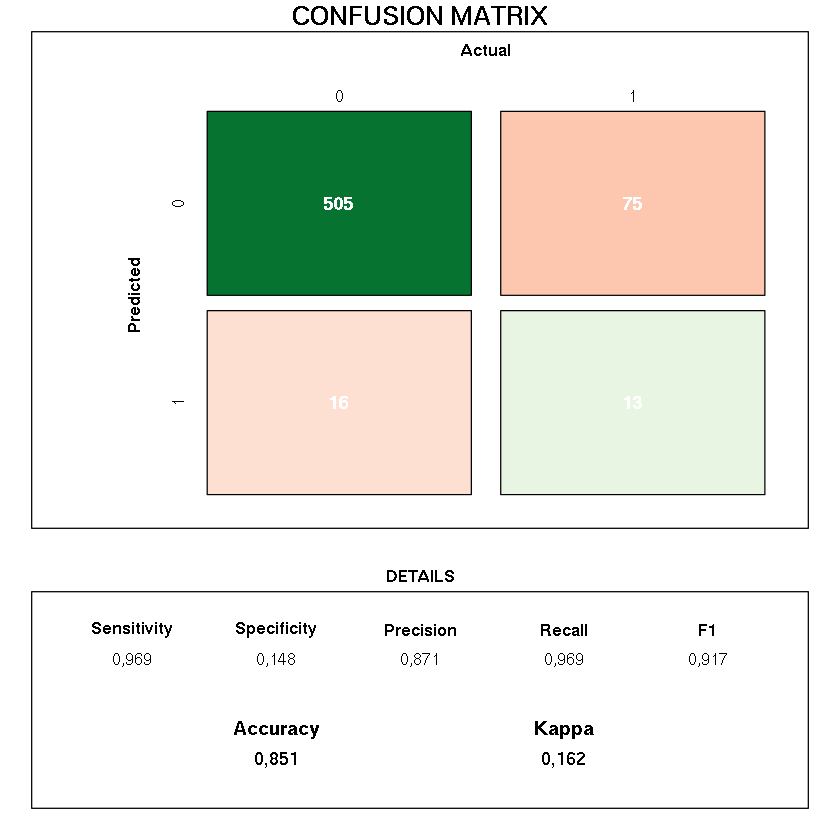

In [612]:
# Evaluation Metrics
log.baselibe.result <- confusionMatrix(data = as.factor(log.pred), as.factor(test.df$churn))
draw_confusion_matrix(log.baselibe.result)

#### on vois ici que l'accuracy globale est très elevé mais par contre  le modele ne sais pas predire les classe de type 1, comme on peut voir sur la matrice de confusion, le modele fait presque un sur deux l'erreur sur la prediction de la classe de type 1

### 5.2. Synthetic Minority Oversampling TEchnique (SMOTE)

In [613]:
# 
ds2.smote <- SMOTE(form = churn~., data = ds2)

# Numériser la variable churn à prédire  
ds2.smote$churn <- as.numeric(ds2.smote$churn) - 1

# Split Data 
# 80/20 train test split  
index <- createDataPartition(y = ds2.smote$churn, p = 0.8, list = FALSE)

train.df <- ds2.smote[index, ]
test.df <- ds2.smote[-index, ]

# Check balance of the training split
print("balance of the training split :")
table(train.df$churn)
cat("\n")

# Check balance of the test split 
print("balance of the test split :")
table(test.df$churn)

[1] "balance of the training split :"



   0    1 
1397 1028 


[1] "balance of the test split :"



  0   1 
335 271 

#### dans ce cas après avoir utilisée la méthode SMOTE les données sont équilibrées pour la variable churn

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

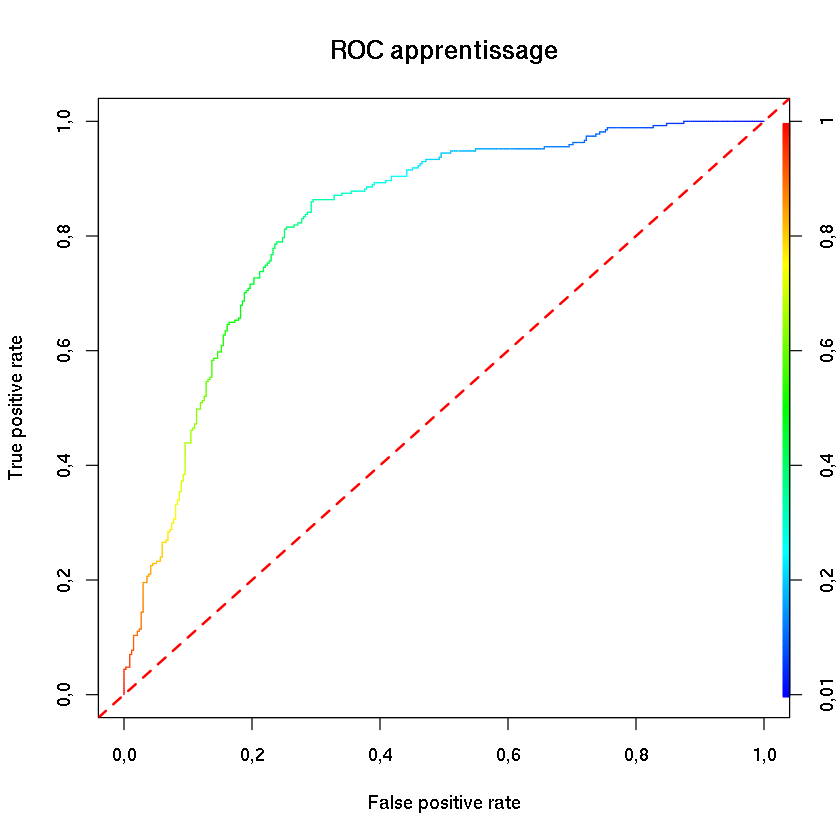

In [614]:
# Run model 
Logistic.smote.model <- glm(churn ~ ., data = train.df, family = binomial(link = "logit"))

# Predict 
log.pred.smote.probs <- predict(Logistic.smote.model, newdata = test.df, type = "response")

# ROC - Curves 
pred2 <- prediction(log.pred.smote.probs, as.factor(test.df$churn))
perf2 <- performance(pred2, "tpr", "fpr")
plot(perf2, colorize = TRUE, main = "ROC apprentissage")
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)

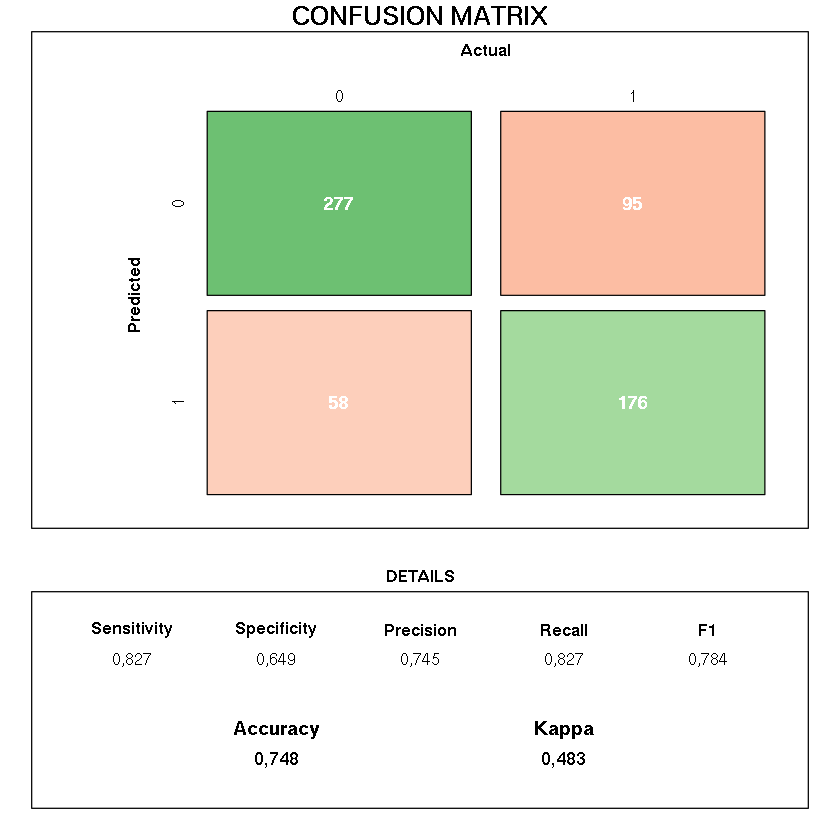

In [615]:
# Convert probs to binary
log.smote.pred <- ifelse(log.pred.smote.probs > 0.5, 1, 0)

# Evaluation Metrics
log.smote.result <- confusionMatrix(data = as.factor(log.smote.pred), as.factor(test.df$churn))
draw_confusion_matrix(log.smote.result)

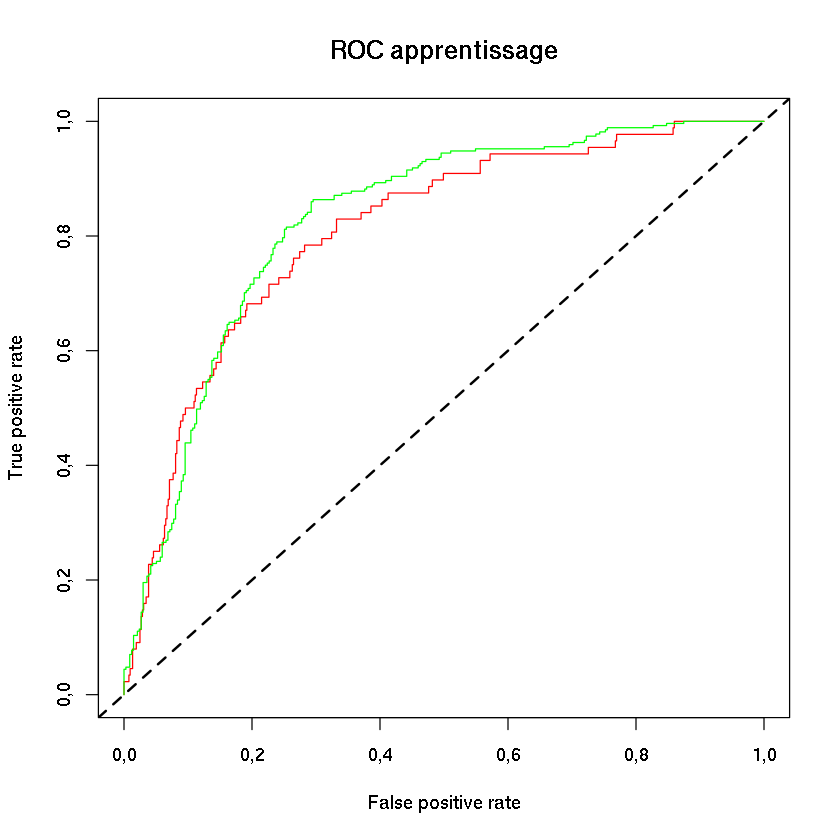

In [616]:
# Comparaison entre baseline et smote 
plot(perf, main = "ROC apprentissage", col = "red") # données déséquilibrées pour la variable churn
plot(perf2, main = "ROC apprentissage", add = T, col = "green") # données courrigés pour la variable churn
abline(a = 0, b = 1, lwd = 2, pch = 0.1, lty = 2)

#### On vois bien que la courbe du modele entrainé sur des donnée déséquilibrées pour la variable churn est en dessous de celui qui entrainées sur les données courrigés,

#### Remarque : dans la suite toutes les modèls seront basées sur les données corrigées

## 5.3.  Feature Elimination

In [617]:
# selection des feature avec la méthode backward appliquée sur les donnée courrigés 
Logistic.smote.model2 <- step(glm(train.df$churn~., data = train.df, family = "binomial"), direction = "backward", trace = F)

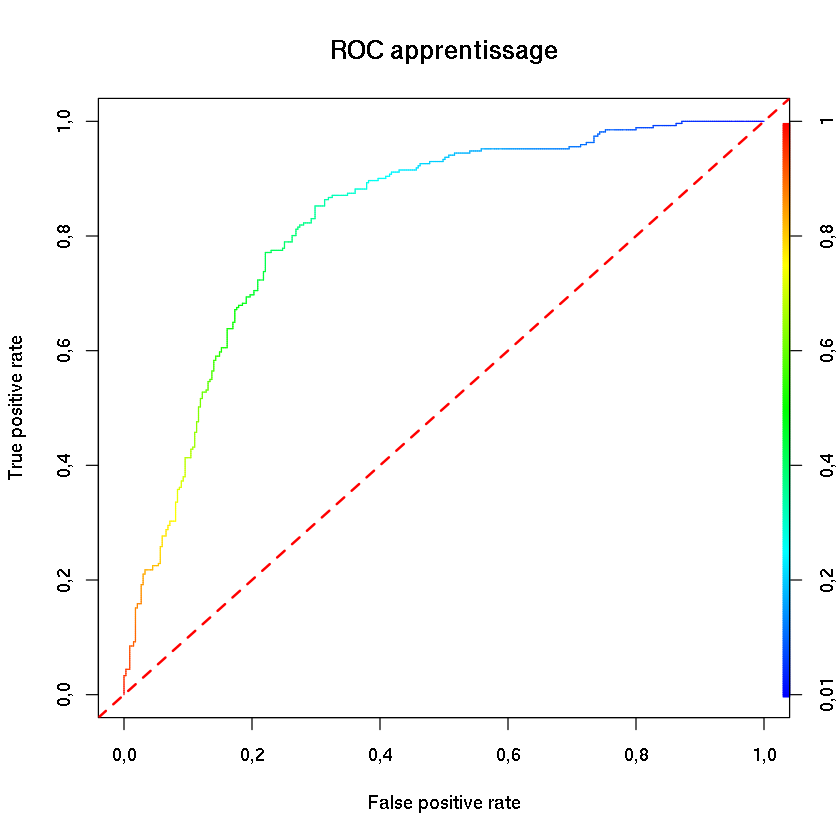

In [618]:
# Predict 
log.pred.smote.probs2 <- predict(Logistic.smote.model2, newdata = test.df, type = "response")

# ROC - Curves 
pred2.1 <- prediction(log.pred.smote.probs2, as.factor(test.df$churn))
perf2.1 <- performance(pred2.1, "tpr", "fpr")
plot(perf2.1, colorize = TRUE, main = "ROC apprentissage", )
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)

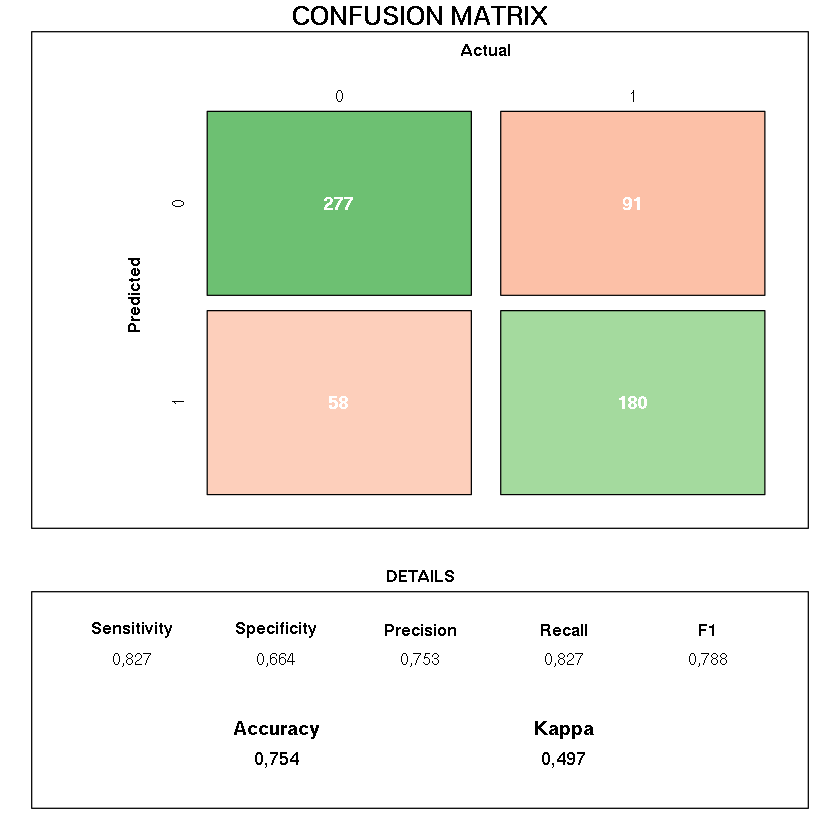

In [619]:
# Convert probs to binary
log.smote.pred2 <- ifelse(log.pred.smote.probs2 > 0.5, 1, 0)

# Evaluation Metrics
log.elimination.AIC.result <- confusionMatrix(data = as.factor(log.smote.pred2), as.factor(test.df$churn))
draw_confusion_matrix(log.elimination.AIC.result)

### Compraison entre les trois modèles 

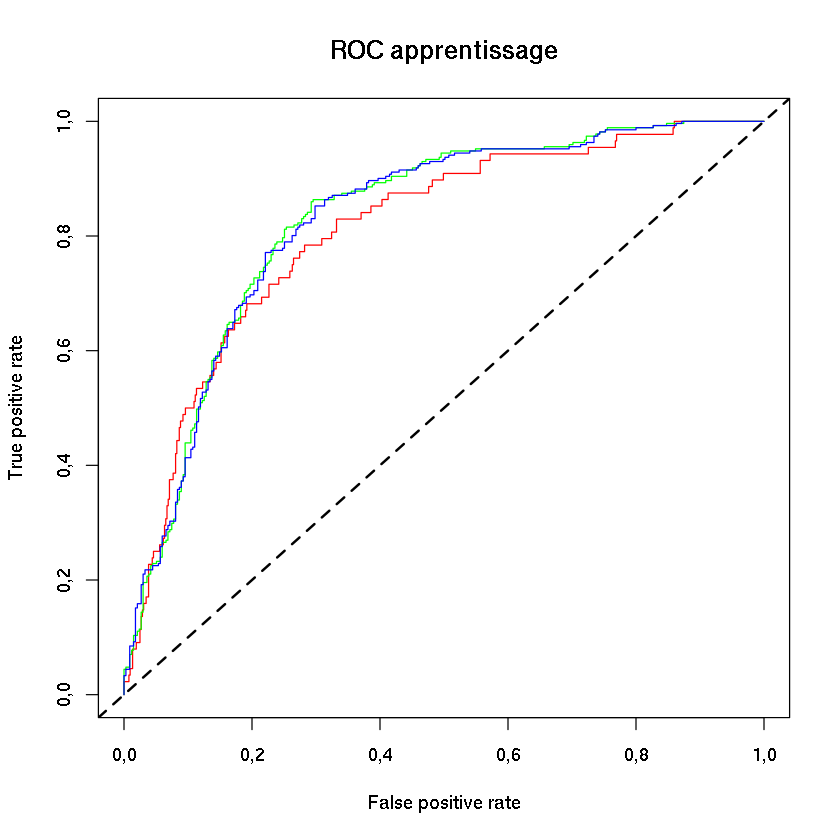

In [620]:
# Comparaison entre baseline et smote 
plot(perf, main = "ROC apprentissage", col = "red") # données déséquilibrées pour la variable churn
plot(perf2, main = "ROC apprentissage", add = T, col = "green") # données courrigés pour la variable churn
plot(perf2.1, main = "ROC apprentissage", add = T, col = "blue") # données séléctionées courrigés pour la variable churn
abline(a = 0, b = 1, lwd = 2, pch = 0.1, lty = 2)

### 5.3 Decision Tree Visualization

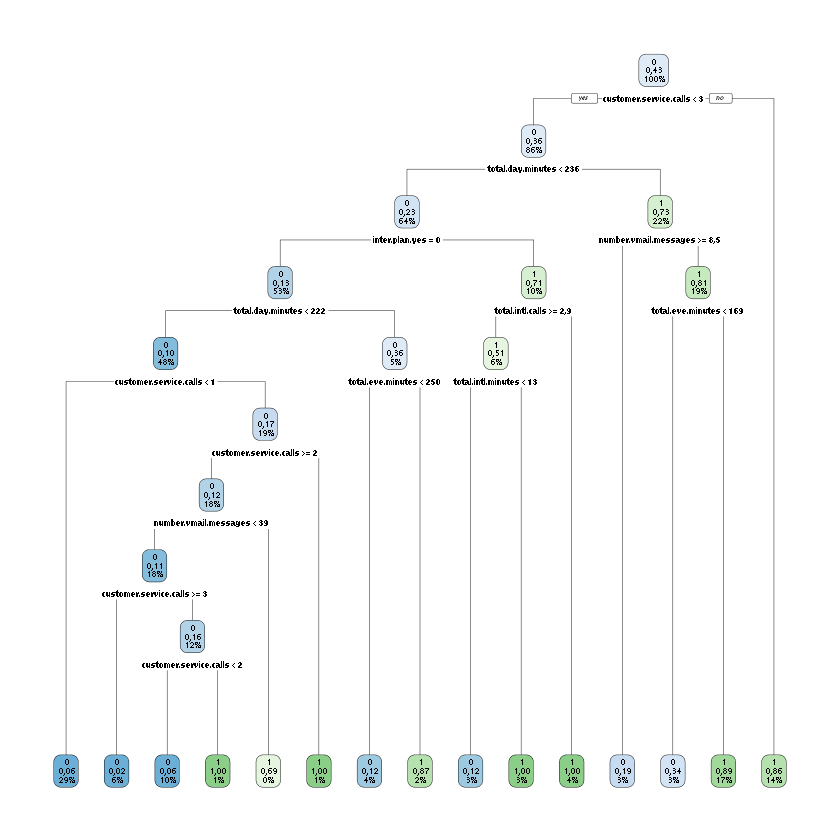

In [621]:
# Train model 
tree.model <- rpart(churn ~ ., data = ds2.smote, method = "class")

# Plot 
rpart.plot(tree.model)

In [622]:
# Predict 
tree.probs <- predict(tree.model, newdata = test.df, type = "prob")[,2]


customer.service.calls       total.day.charge      total.day.minutes 
           310,1753773            273,1981634            273,1981634 
         inter.plan.no         inter.plan.yes       total.eve.charge 
           178,4533444            178,4533444             86,4261758 
     total.eve.minutes     total.intl.minutes      total.intl.charge 
            86,4261758             75,3751873             75,2341942 
 number.vmail.messages        voice.m.plan.no       voice.m.plan.yes 
            63,9071389             55,2891090             55,2891090 
      total.intl.calls        total.eve.calls      total.night.calls 
            36,6316183             17,4202482             13,3693515 
       total.day.calls     total.night.charge    total.night.minutes 
            12,8451048              2,0948878              2,0948878 
                 index                  state         account.length 
             1,0373863              0,7362047              0,1782798

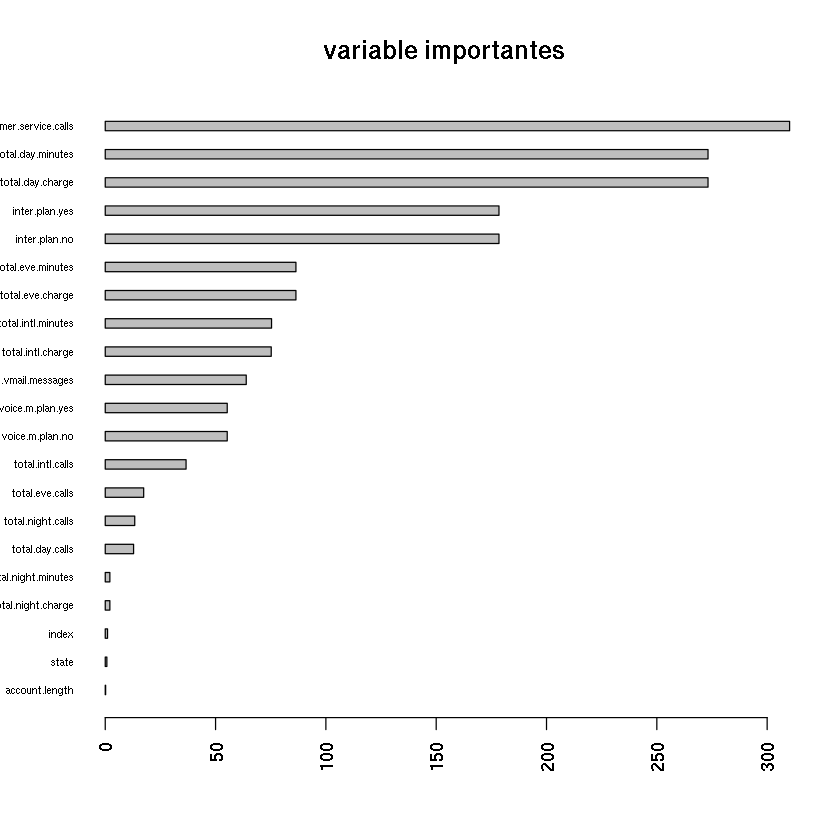

In [623]:
# Look at the variable Importance from the random forest 
barplot(sort(tree.model$variable.importance), horiz = T,cex.names=0.5,  main = "variable importantes", space = 2, las = 2)
tree.model$variable.importance

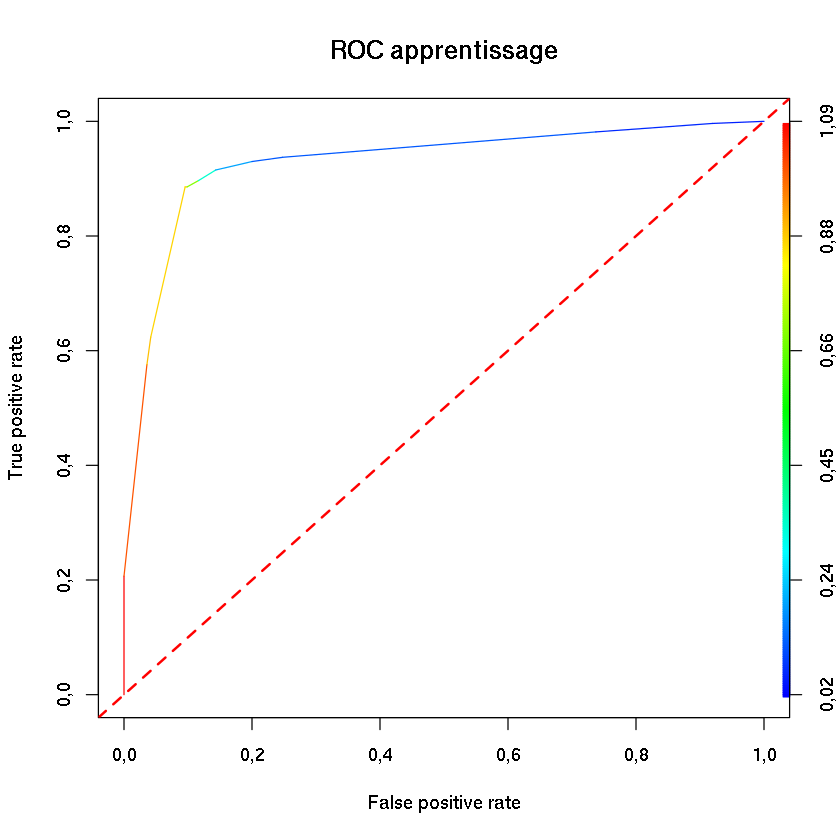

In [624]:
# ROC - Curves 
pred.tree <- prediction(tree.probs, as.factor(test.df$churn))
perf.tree <- performance(pred.tree, "tpr", "fpr")
plot(perf.tree , colorize = TRUE, main = "ROC apprentissage", )
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)

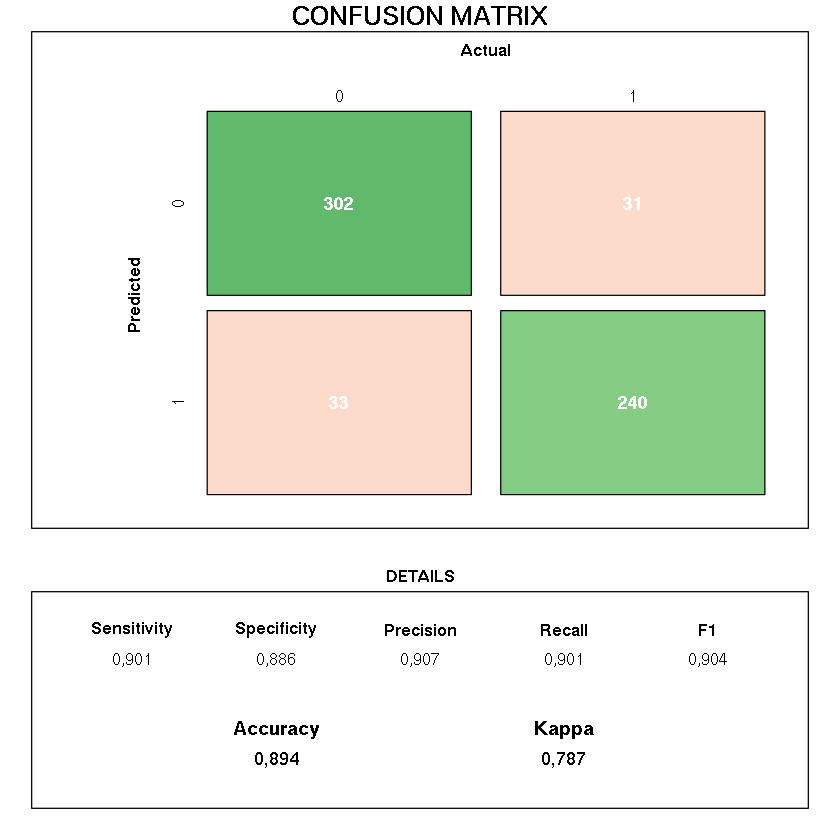

In [625]:
# Convert probs to binary
tree.pred <- ifelse(tree.probs > 0.5, 1, 0)

# Evaluation Metrics
tree.result <- confusionMatrix(data = as.factor(tree.pred), as.factor(test.df$churn))
draw_confusion_matrix(tree.result)

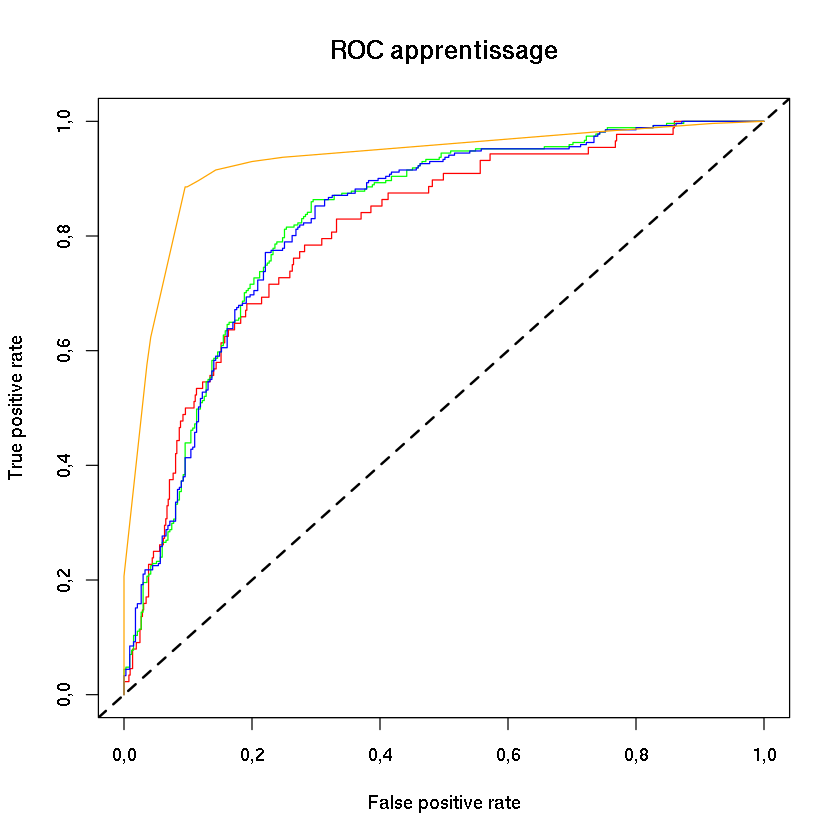

In [626]:
# Comparaison entre baseline et smote 
plot(perf, main = "ROC apprentissage", col = "red") # Logistic entrainée sur des données déséquilibrées pour la variable churn
plot(perf2, main = "ROC apprentissage", add = T, col = "green") # Logistic entrainée sur des données courrigés pour la variable churn
plot(perf2.1, main = "ROC apprentissage", add = T, col = "blue") #Logistique entrainée sur  données séléctionées courrigés pour la variable churn
plot(perf.tree , main = "ROC apprentissage", add = T, col = "orange") # decision tree
abline(a = 0, b = 1, lwd = 2, pch = 0.1, lty = 2)

### 5.4 Random forest 

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


Call:
 randomForest(formula = churn ~ ., data = train.df, type = "classification") 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 7

          Mean of squared residuals: 0,04798681
                    % Var explained: 80,35

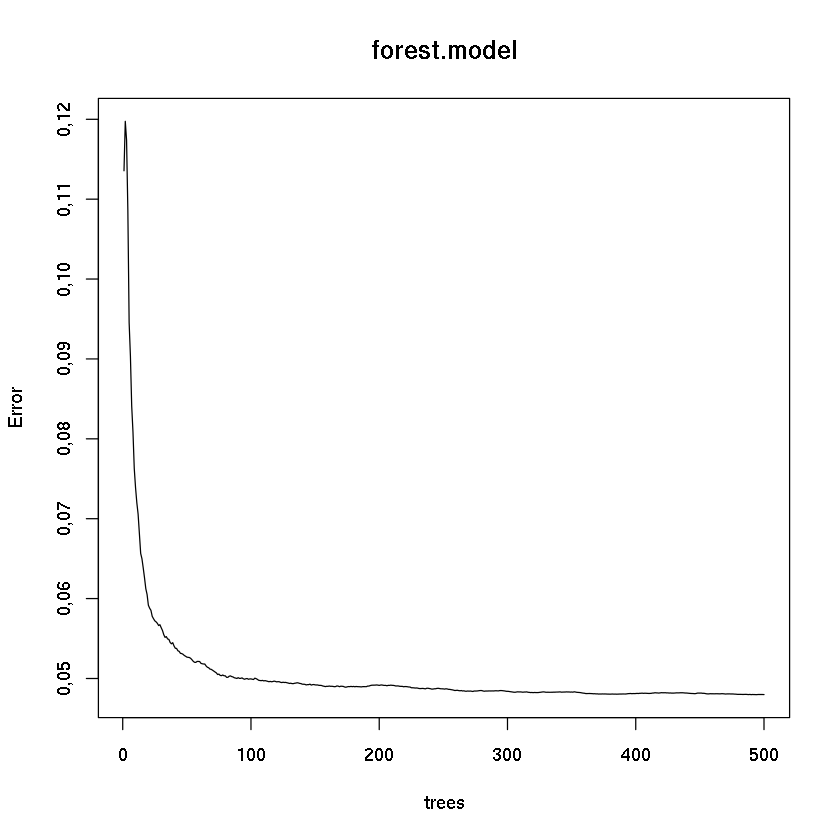

In [627]:
#Train model 
forest.model <- randomForest(churn ~ ., data = train.df, type = "classification")


forest.model
plot(forest.model)

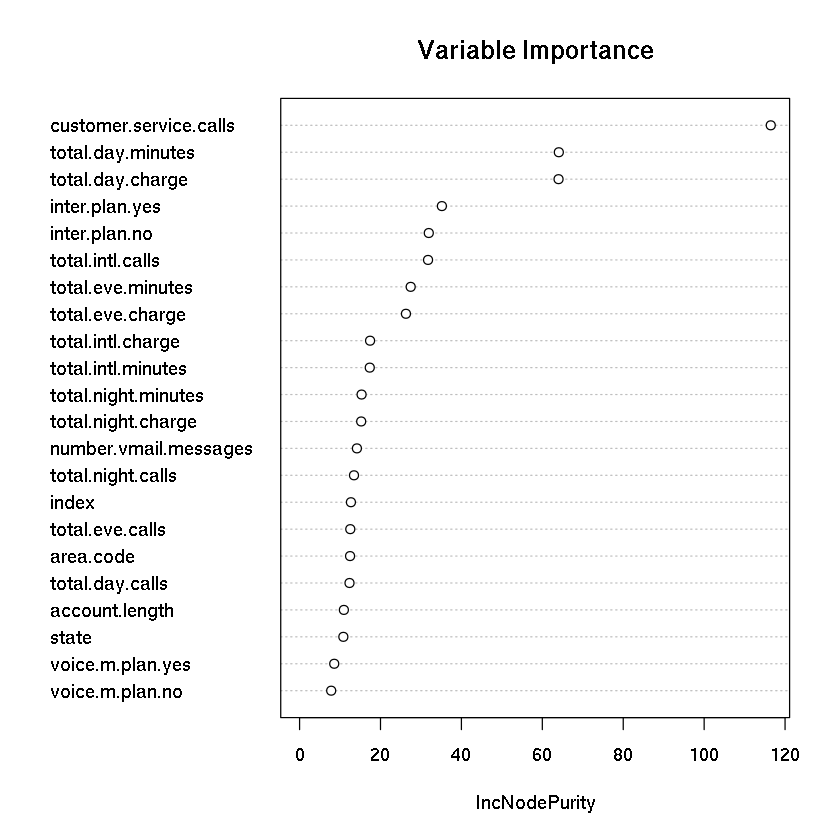

In [628]:
# Look at the variable Importance from the random forest 
varImpPlot(forest.model, sort = T, main="Variable Importance")



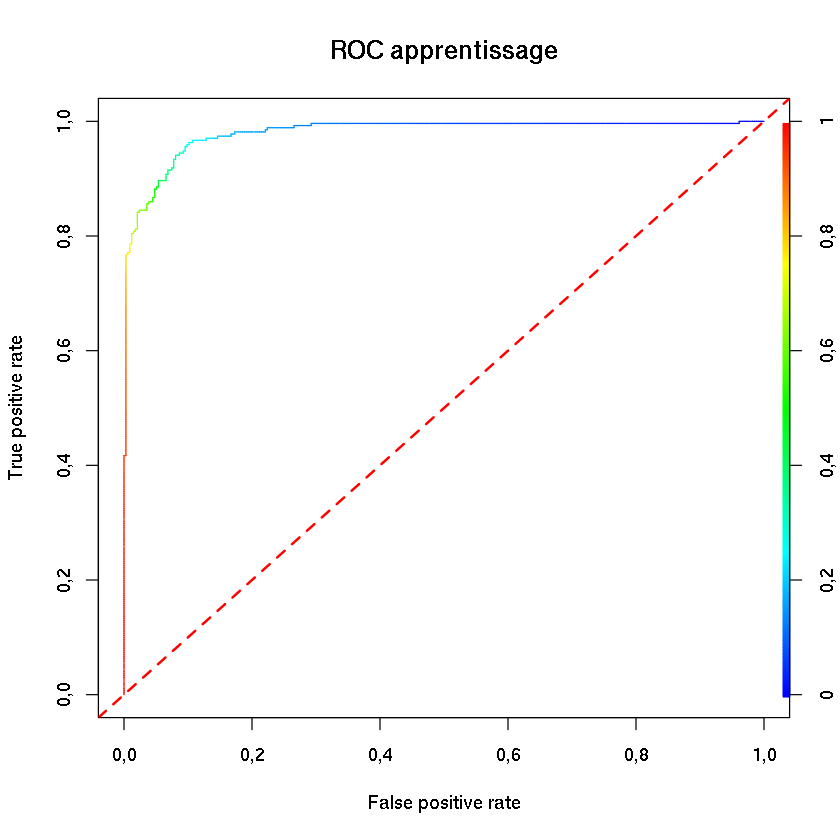

In [629]:
# Predict 
forest.probs <- predict(forest.model, newdata = test.df, type = "class")

# ROC - Curves 
pred.forest <- prediction(forest.probs, as.factor(test.df$churn))
perf.forest <- performance(pred.forest, "tpr", "fpr")
plot(perf.forest , colorize = TRUE, main = "ROC apprentissage", )
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)

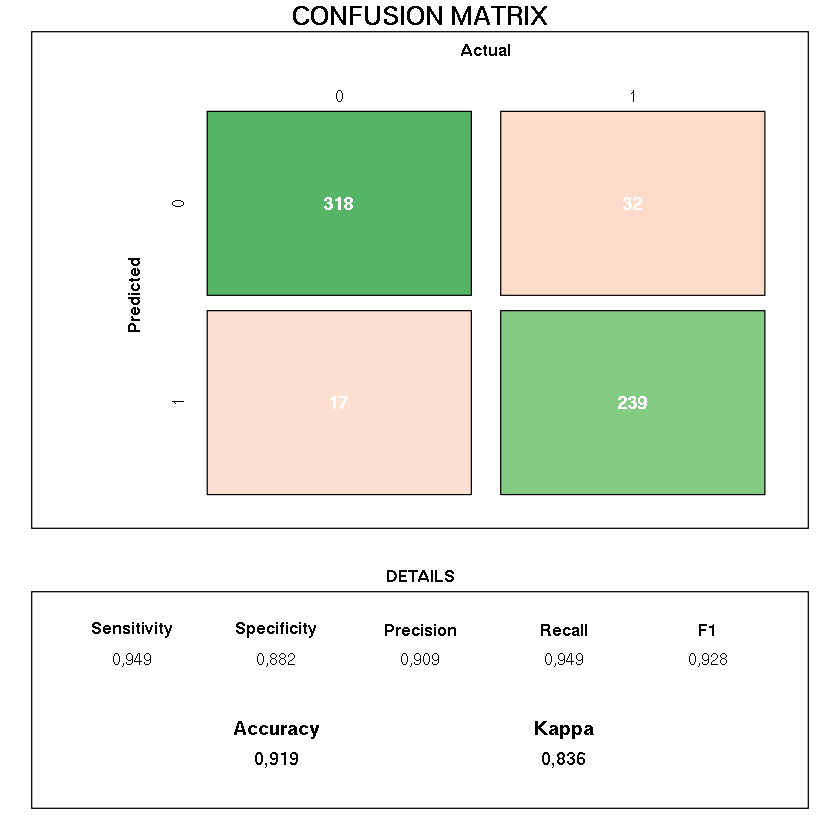

In [630]:
# Convert probs to binary
forest.pred <- ifelse(forest.probs > 0.5, 1, 0)

# Evaluation Metrics
forest.result <- confusionMatrix(data = as.factor(forest.pred), as.factor(test.df$churn))
draw_confusion_matrix(forest.result)

#### Comparaison entre l'arbre de decision et le random forest

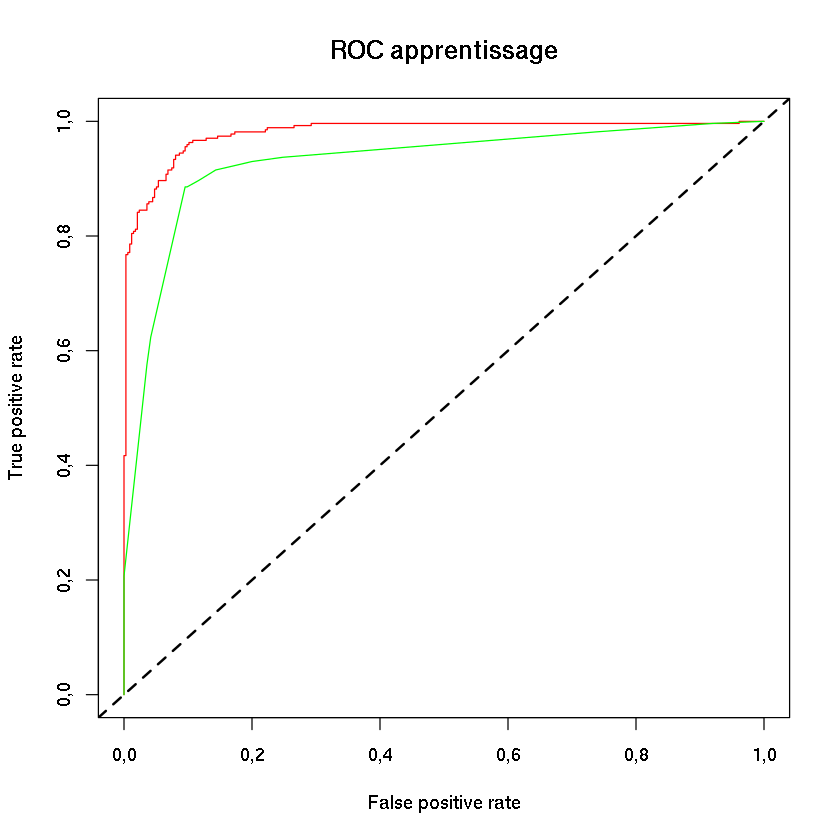

In [631]:
plot(perf.forest , main = "ROC apprentissage", col = "red") # Random forest
plot(perf.tree , main = "ROC apprentissage", add = T, col = "green") # decision tree
abline(a = 0, b = 1, lwd = 2, pch = 0.1, lty = 2)

#### la courbe du modèl random forest est située en dessus de celle du simple arbre de decision ce qui explique que le random forest est plus fiable 

### 5.5 Boosting

,var,rel.inf
customer.service.calls,customer.service.calls,"25,8148118"
total.day.minutes,total.day.minutes,"23,2973464"
inter.plan.no,inter.plan.no,"8,0922642"
inter.plan.yes,inter.plan.yes,"7,8147264"
total.intl.calls,total.intl.calls,"6,9851860"
total.eve.minutes,total.eve.minutes,"5,9491632"
area.code,area.code,"3,3963957"
number.vmail.messages,number.vmail.messages,"2,7791789"
voice.m.plan.no,voice.m.plan.no,"2,5050029"
total.intl.minutes,total.intl.minutes,"2,4340676"


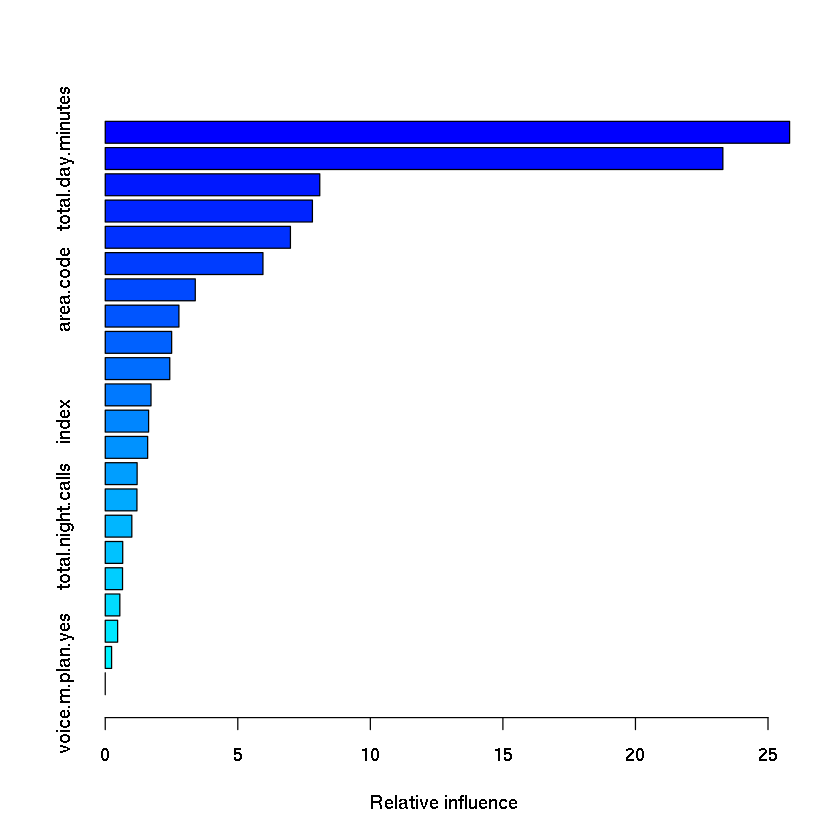

In [632]:
# Train
boosting.model <- gbm(train.df$churn ~ ., data = train.df, distribution = "gaussian", n.trees = 1000, shrinkage =  0.01, interaction.depth = 4)

summary(boosting.model)

# Predict 
boosting.probs <- predict(boosting.model, newdata = test.df, type = "response", n.trees = 1000)


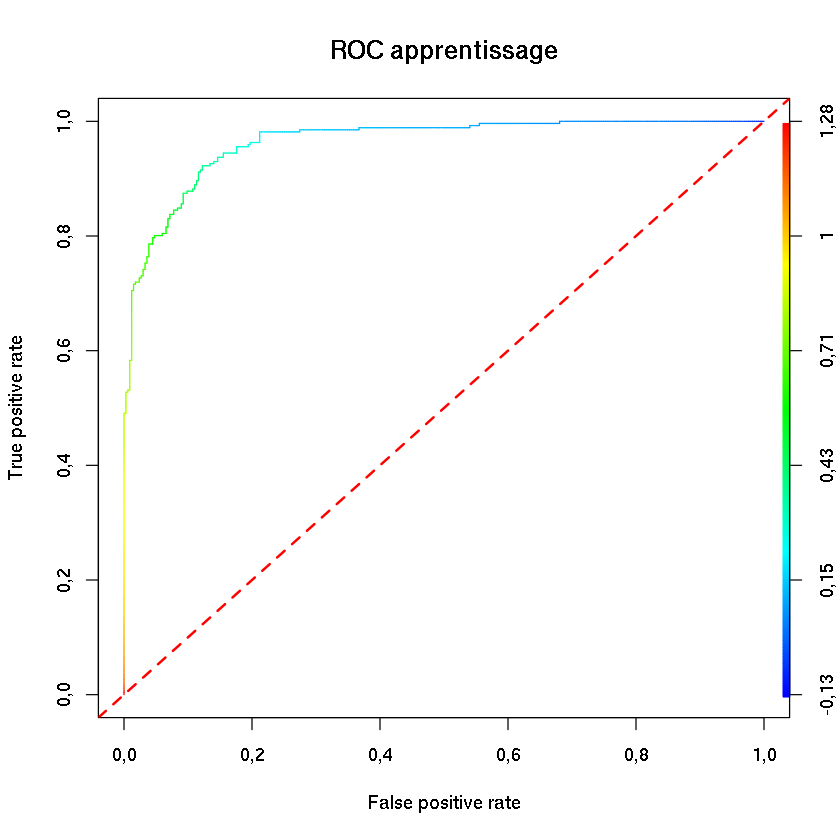

In [633]:
# ROC - Curves 
pred.boosting <- prediction(boosting.probs, as.factor(test.df$churn))
perf.boosting <- performance(pred.boosting, "tpr", "fpr")
plot(perf.boosting , colorize = TRUE, main = "ROC apprentissage", )
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)

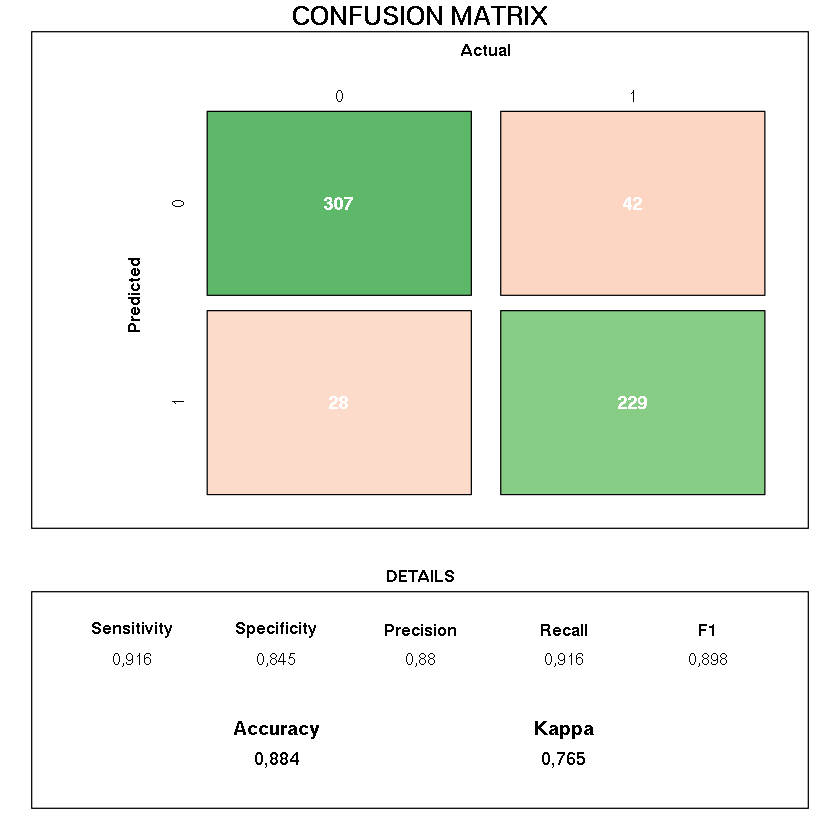

In [634]:
# Convert probs to binary
boosting.pred <- ifelse(boosting.probs > 0.5, 1, 0)

# Evaluation Metrics
boosting.result <- confusionMatrix(data = as.factor(boosting.pred), as.factor(test.df$churn))
draw_confusion_matrix(boosting.result)

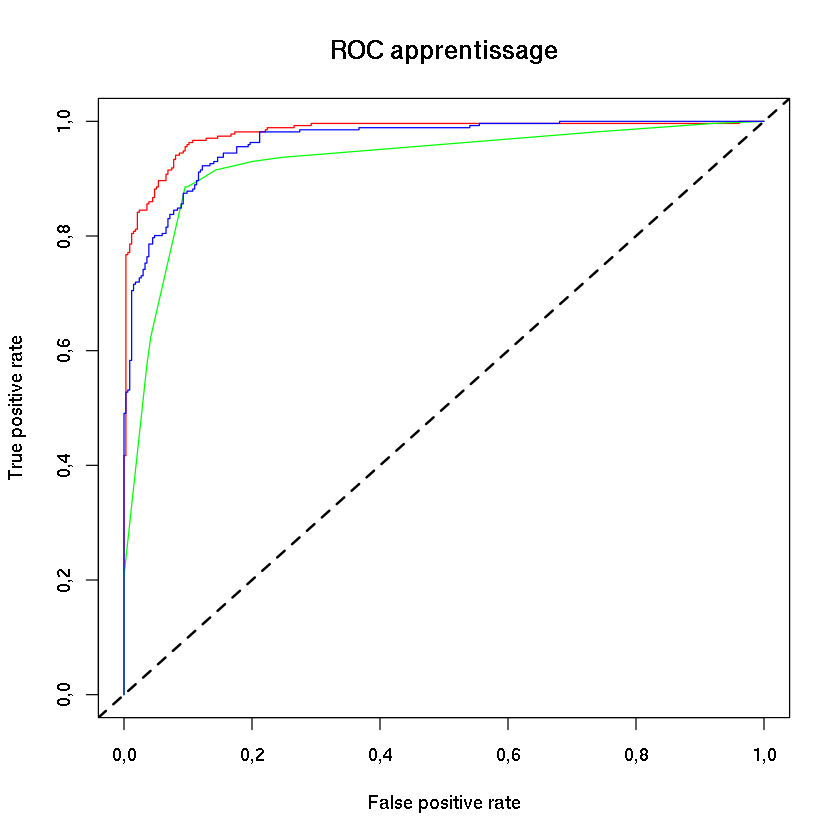

In [635]:
# Comparaisons entre les models 

plot(perf.forest , main = "ROC apprentissage", col = "red") # Random forest
plot(perf.tree , main = "ROC apprentissage", add = T, col = "green") # decision tree
plot(perf.boosting , main = "ROC apprentissage", add = T, col = "blue") # boosting 
abline(a = 0, b = 1, lwd = 2, pch = 0.1, lty = 2)

### 5.6 Support Vector Machine


Call:
svm(formula = train.df$churn ~ ., data = train.df, type = "C-classification", 
    kernel = "radial", scale = T)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  1077



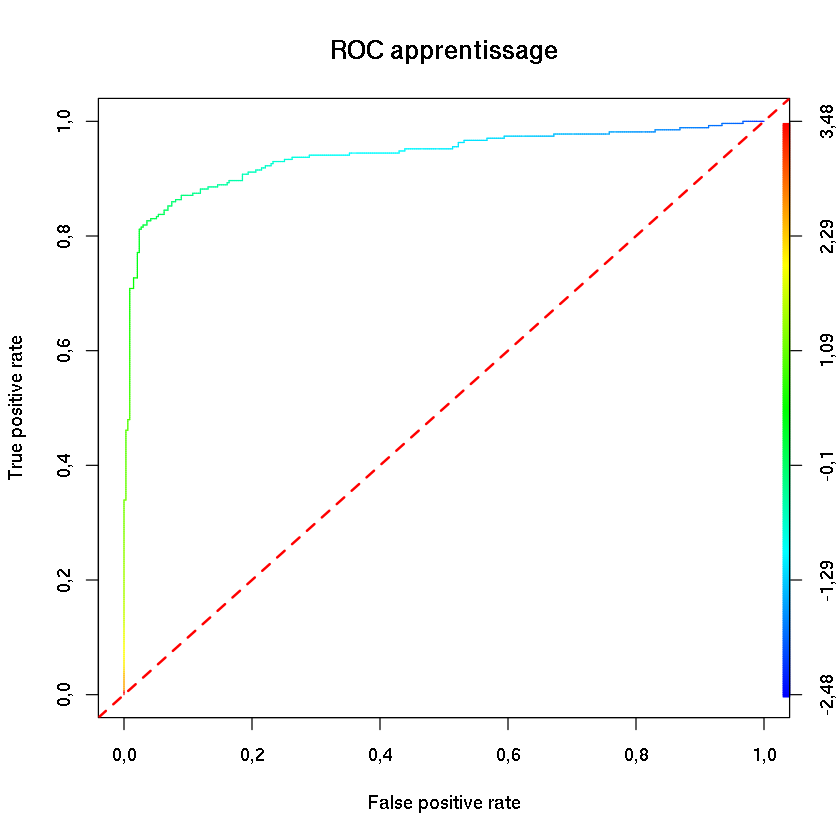

In [636]:
# Kernel radial 

# Train 
svm.radial.model <- svm(train.df$churn ~ ., data = train.df, type = "C-classification", kernel = "radial", scale = T)

print(svm.radial.model)

# Predict
svm.radial.pred <- predict(svm.radial.model, newdata = test.df, decision.values = T)

# ROC - Courbe
fitted.rad <- attributes(svm.radial.pred)$decision.values * -1
pred.svm.rad<- prediction(fitted.rad, as.factor(test.df$churn))
perf.svm.rad <- performance(pred.svm.rad, "tpr", "fpr")
plot(perf.svm.rad , colorize = TRUE, main = "ROC apprentissage", )
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)


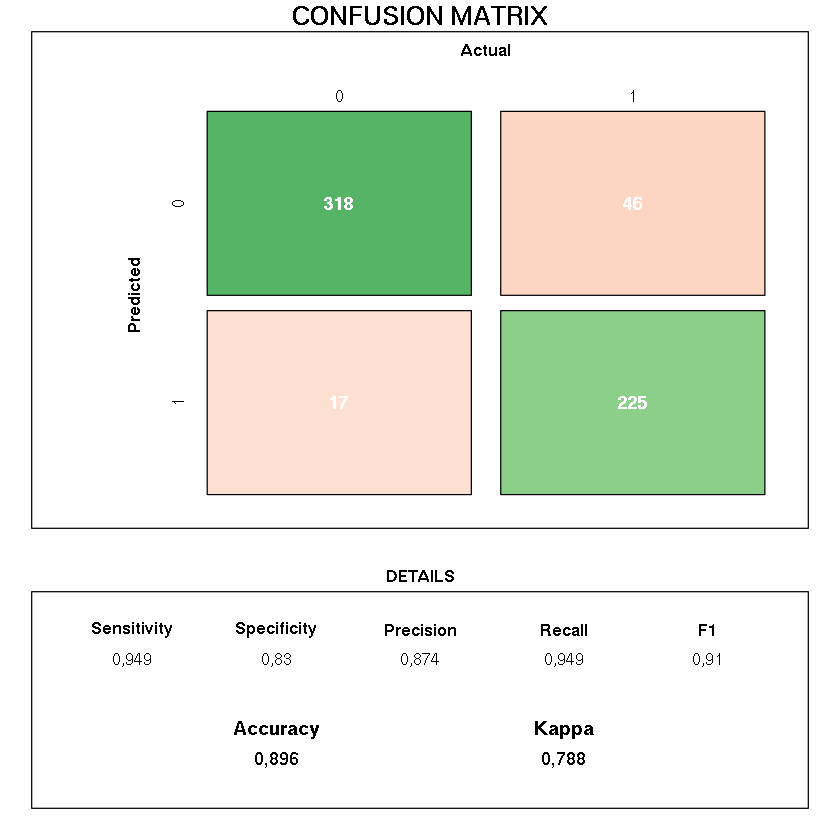

In [637]:
# Evaluation Metrics
svm.rad.result <- confusionMatrix(data = as.factor(svm.radial.pred), as.factor(test.df$churn))
draw_confusion_matrix(svm.rad.result)


Call:
svm(formula = train.df$churn ~ ., data = train.df, type = "C-classification", 
    kernel = "linear", scale = T)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  1306



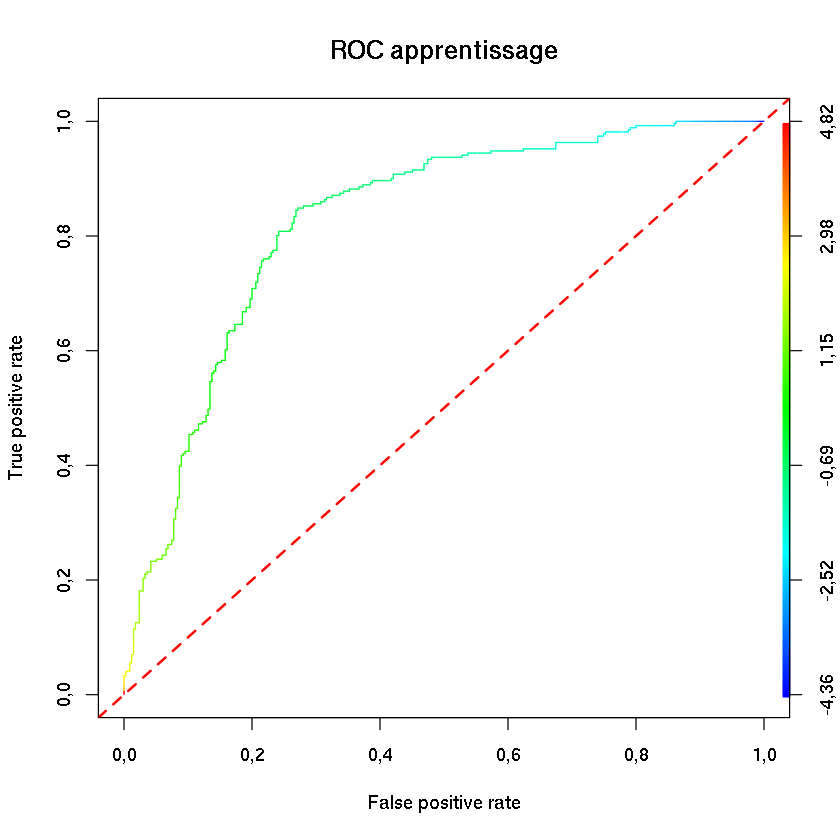

In [638]:
# Kernel linear 

# Train 
svm.linear.model <- svm(train.df$churn ~ ., data = train.df, type = "C-classification", kernel = "linear", scale = T)

print(svm.linear.model)

# Predict
svm.linear.pred <- predict(svm.linear.model, newdata = test.df, decision.values = T)

# ROC - Courbe
fitted.lin <- attributes(svm.linear.pred)$decision.values * -1
pred.svm.lin<- prediction(fitted.lin, as.factor(test.df$churn))
perf.svm.lin <- performance(pred.svm.lin, "tpr", "fpr")
plot(perf.svm.lin , colorize = TRUE, main = "ROC apprentissage", )
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)


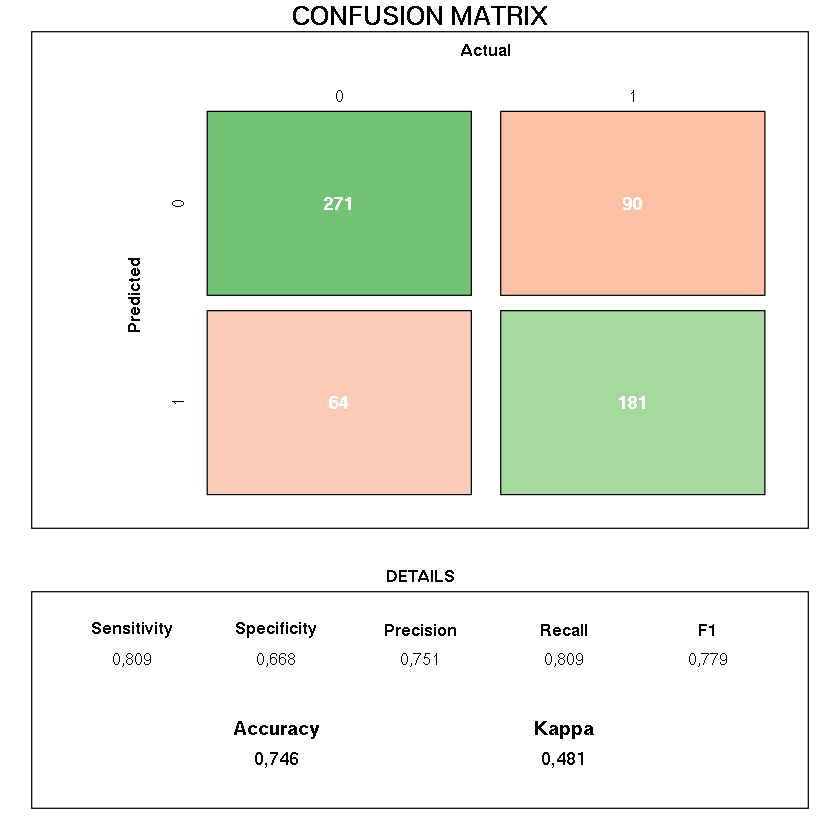

In [639]:

# Evaluation Metrics
svm.lin.result <- confusionMatrix(data = as.factor(svm.linear.pred), as.factor(test.df$churn))
draw_confusion_matrix(svm.lin.result)


Call:
svm(formula = train.df$churn ~ ., data = train.df, type = "C-classification", 
    kernel = "polynomial", scale = T)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  1165



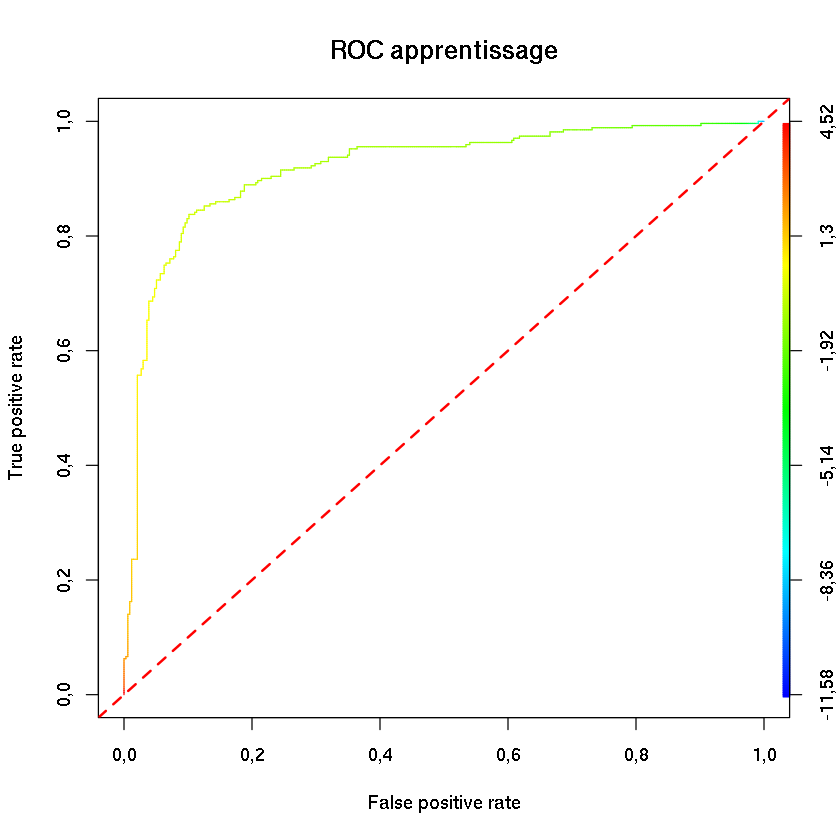

In [640]:
# Kernel plynomial 

# Train 
svm.poly.model <- svm(train.df$churn ~ ., data = train.df, type = "C-classification", kernel = "polynomial", scale = T)

print(svm.poly.model)

# Predict
svm.ply.pred <- predict(svm.poly.model, newdata = test.df, decision.values = T)


# ROC - Courbe
fitted.pol<- attributes(svm.ply.pred)$decision.values * -1
pred.svm.pol<- prediction(fitted.pol, as.factor(test.df$churn))
perf.svm.pol <- performance(pred.svm.pol, "tpr", "fpr")
plot(perf.svm.pol , colorize = TRUE, main = "ROC apprentissage")
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)


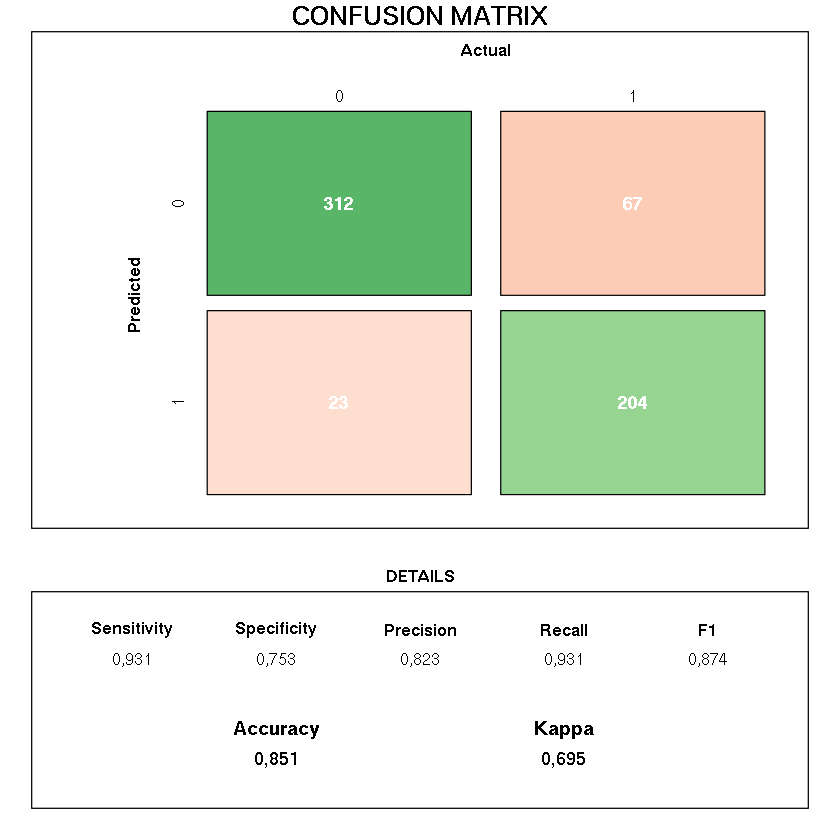

In [641]:

# Evaluation Metrics
svm.pol.result <- confusionMatrix(data = as.factor(svm.ply.pred), as.factor(test.df$churn))
draw_confusion_matrix(svm.pol.result)

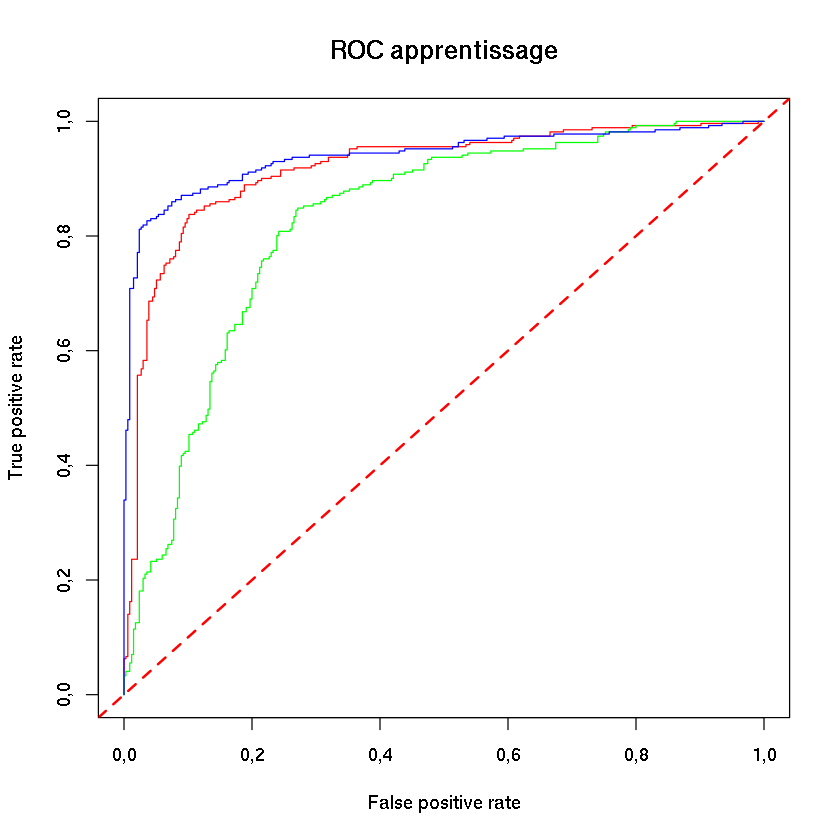

In [642]:
# comparaison des SVM
plot(perf.svm.pol, main = "ROC apprentissage", col = "red") # kernel polynimial 
plot(perf.svm.lin, add = T, col = "green") # kernel linear 
plot(perf.svm.rad, col = "blue", add = T ) # kernel radial
abline(a = 0, b = 1, col = "red", lwd = 2, pch = 0.1, lty = 2)

#### Remarque : on vois que  le SVM avec le kernel radial est le plus performant 

### 6. Model Performances 

#### 6.1 Model performances metrics

In [643]:

Model <- c("log.base", "log.smote", "log.AIC", "tree", "forest", "boosting", "svm.pol", "svm.lin", "svm.rad")
Accuracy <- c(log.baselibe.result$overall[1], log.smote.result$overall[1], log.elimination.AIC.result$overall[1], tree.result$overall[1], forest.result$overall[1], boosting.result$overall[1], svm.pol.result$overall[1], svm.lin.result$overall[1], svm.rad.result$overall[1])
Reccall_score <- c(log.baselibe.result$byClass[6], log.smote.result$byClass[6], log.elimination.AIC.result$byClass[6], tree.result$byClass[6], forest.result$byClass[6], boosting.result$byClass[6], svm.pol.result$byClass[6], svm.lin.result$byClass[6], svm.rad.result$byClass[6])          
Precision <- c(log.baselibe.result$byClass[5], log.smote.result$byClass[5], log.elimination.AIC.result$byClass[5], tree.result$byClass[5], forest.result$byClass[5], boosting.result$byClass[5], svm.pol.result$byClass[5], svm.lin.result$byClass[5], svm.rad.result$byClass[5])
F1 <- c(log.baselibe.result$byClass[7], log.smote.result$byClass[7], log.elimination.AIC.result$byClass[7], tree.result$byClass[7], forest.result$byClass[7], boosting.result$byClass[7], svm.pol.result$byClass[7], svm.lin.result$byClass[7], svm.rad.result$byClass[7] )
Kappa <- c(log.baselibe.result$overall[2], log.smote.result$overall[2], log.elimination.AIC.result$overall[2], tree.result$overall[2], forest.result$overall[2], boosting.result$overall[2], svm.pol.result$overall[2], svm.lin.result$overall[2], svm.rad.result$overall[2])

#  DF
perf.model <- data.frame(Model = Model, Accuracy = Accuracy, Reccall_score = Reccall_score, Precision = Precision, F1 = F1, Kappa = Kappa)
perf.model 

Model,Accuracy,Reccall_score,Precision,F1,Kappa
log.base,"0,8505747","0,9692898","0,8706897","0,9173479","0,1622096"
log.smote,"0,7475248","0,8268657","0,7446237","0,7835926","0,4826062"
log.AIC,"0,7541254","0,8268657","0,7527174","0,7880512","0,4968516"
tree,"0,8943894","0,9014925","0,9069069","0,9041916","0,7865469"
forest,"0,9191419","0,9492537","0,9085714","0,9284672","0,8355905"
boosting,"0,8844884","0,9164179","0,8796562","0,8976608","0,7652125"
svm.pol,"0,8514851","0,9313433","0,8232190","0,8739496","0,6948879"
svm.lin,"0,7458746","0,8089552","0,7506925","0,7787356","0,4812624"
svm.rad,"0,8960396","0,9492537","0,8736264","0,9098712","0,7875625"


###  6.2 Compare Model Metrics

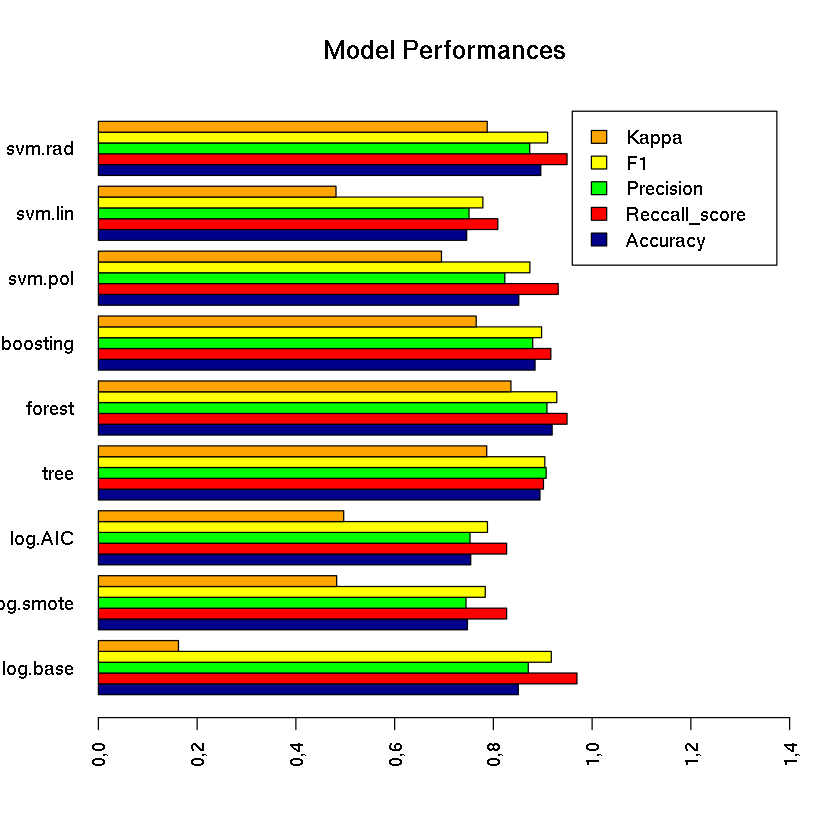

In [644]:
m <- t(as.matrix(perf.model[,2:6]))
colnames(m) <- perf.model[,1]

barplot(m, col=c("darkblue","red", "green", "yellow", "orange"),
        legend.text = rownames(m), xlim = c(0,1.4), horiz = T, beside = T, cex.names=1, main = "Model Performances", las = 2)

### 6.3 ROC - Curves for models

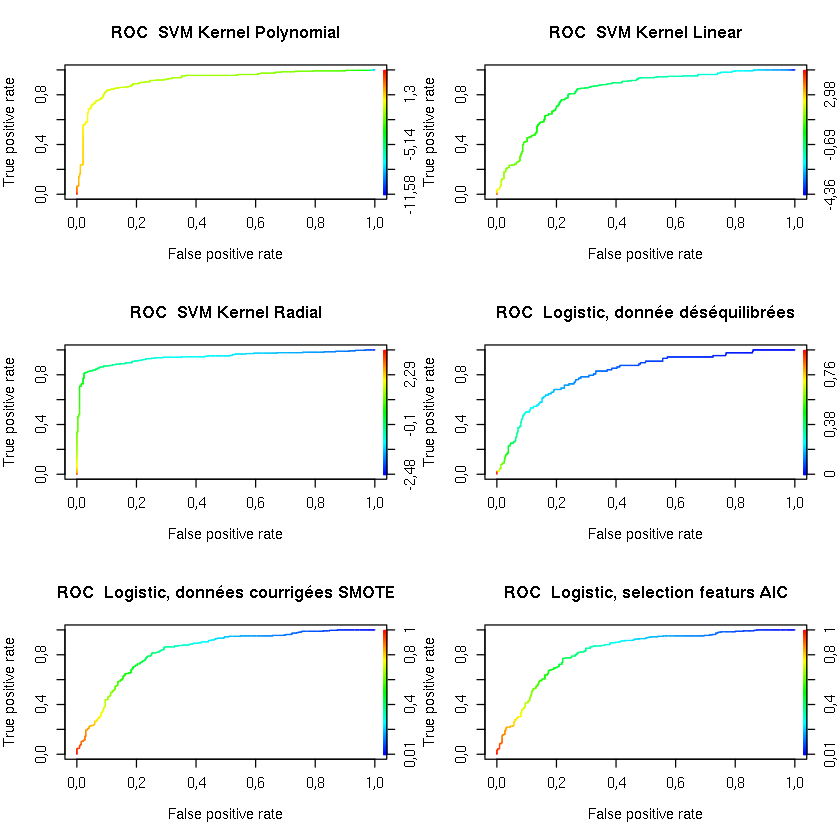

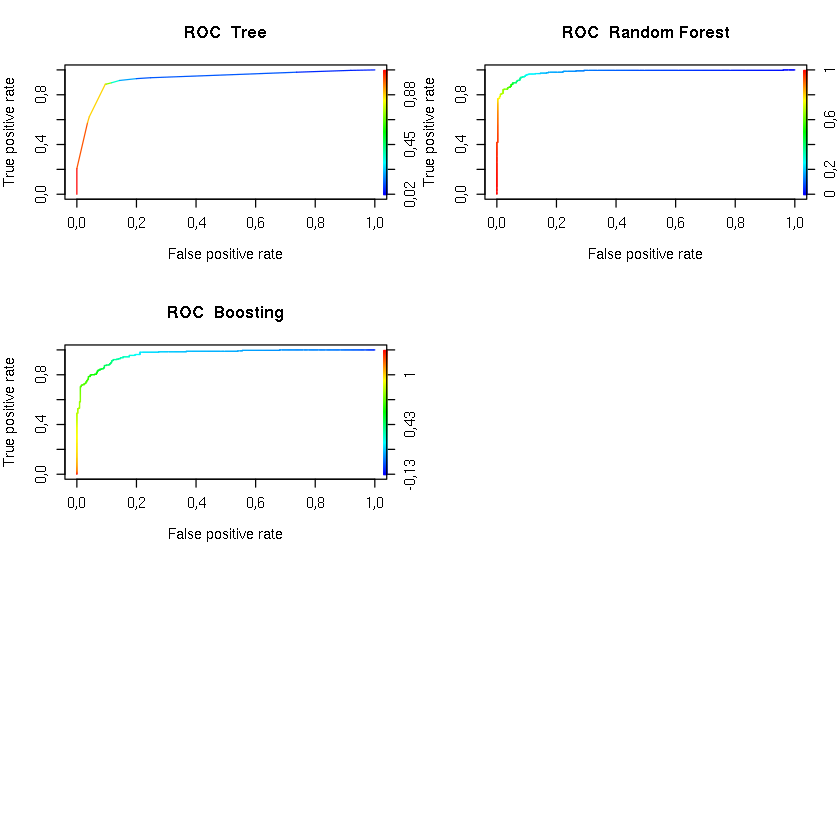

In [660]:
par(mfrow = c(3,2))

plot(perf.svm.pol, colorize = T, main = "ROC  SVM Kernel Polynomial") # kernel polynimial 
plot(perf.svm.lin, colorize = T, main = "ROC  SVM Kernel Linear",) # kernel linear 
plot(perf.svm.rad, colorize = T, main = "ROC  SVM Kernel Radial",) # kernel radial
plot(perf, colorize = T, main = "ROC  Logistic, donnée déséquilibrées") # Logistic entrainée sur des données déséquilibrées pour la variable churn
plot(perf2,colorize = T, main = "ROC  Logistic, données courrigées SMOTE") # Logistic entrainée sur des données courrigés pour la variable churn
plot(perf2.1, colorize = T, main = "ROC  Logistic, selection featurs AIC") #Logistique entrainée sur  données séléctionées courrigés pour la variable churn
plot(perf.tree ,colorize = T, main = "ROC  Tree") # decision tree
plot(perf.forest , colorize = T, main = "ROC  Random Forest") # Random forest
plot(perf.boosting , colorize = T, main = "ROC  Boosting") # boosting 

### 7. Conclusion & Perspective

*  les models Random forest et SVM avec un kernel de type "radial" sont les plus performants pour la prédiction du churn. Pour les variables d'après notre analyse on voit bien que chaque modèle se basent sur des variables plus ou moins différentes. Les variables descriminantes par ordre de pertinences sont : **customer.service.Calls**, **total .day.Minutes**, **total.day.charge** et **inter.plan** 

* le modele non étudié ici pour completer notre analyse est le perceptron qui est un classifieur binaire simple à implemeter et puissant et Il s'agit d'un neurone formel muni d'une règle d'apprentissage qui permet de déterminer automatiquement les poids synaptiques de manière à séparer un problème d'apprentissage supervisé. 